<a href="https://colab.research.google.com/github/SergioNietoP/machine-learning-datasheets/blob/main/Turf_Prediction_prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DataSheet Description**

---


En este proyecto emplearemos un dataset que contiene información de los resultados de las carreras de el panorama nacional de carreras de caballos.

- **Puesto** (Clase): Posición en la que terminan la carrera **int64**
- **NombreCaballo**: Nombre de caballo  **object**
- **Peso** : Peso de caballo  **object**
- **Edad**: Edad de caballo **int64**
- **DistanciaMeta**: Distancia respecto a ganador en llegada a meta **object** (DROPEAR)
- **Mantilla**: Dorsal   **int64**
- **Dividendo** : Pago por euro apostado por ganador de carrera **object** (DROPEAR)
- **Propietario** : Cuadra Propietaria **object**
- **Preparador**: Nombre Preparador **object**
- **Jinete**: Jinete o Amazona que monta al caballo en esta carrera  **object**
- **Problemas**: Problemas que posee en esta carrera el caballo  **object**
- **UltimasActuaciones** : Posiciones en las que acaba el caballo de mas antigua a mas reciente (de izquierda a derecha)  **object** (¿COMO LA CALCULO?)
- **Fecha**: Fecha Carrera   **object**
- **Hora**: Hora carrera  **object**
- **Terreno**: Estado del terreno en carrera **object**
- **Distancia**: Longitud carrera  **float64**
- **Tipo**: Tipo de terreno en carrera  **object**
- **Categoría**: Categoria Caballos Participantes  **object**
- **SentidoHipodromo**:  (0 -> Sentido Normal, 1 -> Inverso) **int64**
- **Meteorología**: Previsión estado meteorología del día entero **object** (Tiempo3)
- **Lluvia**: Previsión cantidad de lluvia del dia entero  **object**
- **Viento**: Previsión velocidad de viento del dia entero  **int64**
- **Temperatura**: Previsión de temp. del horario de la carrera  **int64**
- **Hipodromo**: Nombre del hipódromo de la carrera   **object**

In [138]:
import pandas as pd
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.compose
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

url = 'https://raw.githubusercontent.com/SergioNietoP/machine-learning-datasheets/main/Learning%20Datasheets/Turf%20Prediction/Data%20Turf%20Races%20Train%20-%206.csv'

url1 = 'https://raw.githubusercontent.com/SergioNietoP/machine-learning-datasheets/main/Learning%20Datasheets/Turf%20Prediction/Data%20Turf%20Races%20Test%20-%202.csv'
test = pd.read_csv(url1, sep=',')


train = pd.read_csv(url, sep=',')

train = train.drop('DistanciaMeta', axis=1)
train = train.drop('Dividendo', axis=1)

ogData = train
train.head()
train.count()



Puesto                782
NombreCaballo         782
Peso                  782
Edad                  782
Mantilla              782
Propietario           782
Preparador            782
Jinete                782
Problemas             425
UltimasActuaciones    782
Fecha                 782
Hora                  782
Terreno               782
Distancia             782
Tipo                  781
Categoría             782
SentidoHipodromo      782
Meteorología          782
LLuvia                782
Viento                782
Temperatura           782
Hipodromo             782
dtype: int64

In [139]:
# def getDebutantes(arrayLast):
#   aux = []
#   index = 0
#   for element in arrayLast:
#     element = element.replace(',', '')
#     element = element.replace('[', '')
#     element = element[:len(element)-1]
#     if 'Debutante' in element:
#       aux.append(index)
#     index += 1
#   return aux

# #Desarrollar crear columnas en 

# def getNombres(array):
#   aux = []
#   for element in array:
#     nombre = train.at[element, 'NombreCaballo']
#     nombre = nombre.partition('(')[0]
#     aux.append(nombre)
#   return aux

# def createColumnas(array):
#   for element in array:
#     train[element] = 0
    
# t_array = test["UltimasActuaciones"]
# variable = getDebutantes(t_array)
# columnas = getNombres(variable)
# createColumnas(columnas)

# Preprocesamiento
---

In [140]:
pd.set_option('display.max_columns', None)
train.head(10)


,Puesto,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,UltimasActuaciones,Fecha,Hora,Terreno,Distancia,Tipo,Categoría,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo
0,1,SAFAGA,57,2,6,ASOC.LA TOLEDANA...,CH.DELCHER,G.GUEDJ-GAY,NaN,"[02,04,01]",13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
1,2,ROCK MOON,57,2,5,MEDREAL,G.ARIZKORRETA,V. JANACEK,NaN,"[04,06]",13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
2,3,ISOLDA,57,2,3,EL HERROJO,J.M.OSORIO,J.GELABERT,NaN,[01],13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
3,4,LADY CLUNIA,57,2,4,BRAZACORTA,B.RAMA,B. FAYOS,-8,"[08,15]",13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
4,5,DE FIESTA (IRE) (a),57,2,2,REZA PAZOOKI,O.ANAYA,R.N.VALLE,-8,"[09,11]",13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
5,6,ALERTA ROJA,57,2,1,LAC INTERNACIONA...,A.SOTO,C. CADEL,-3,"[07,05]",13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
6,1,BAILEN,57,2,3,LEONESA,J.LOPEZ,J.GELABERT,NaN,"[01,08]",13 de noviembre de 2022,12:20,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
7,2,ARAKA LA KANA,57,2,2,ODISEA,J.LOPEZ,C.PEREZ,-3,[02],13 de noviembre de 2022,12:20,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
8,3,WITIZA,57,2,9,LAC INTERNACIONA...,J.LOPEZ,B. FAYOS,-3,"[05,04,04]",13 de noviembre de 2022,12:20,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
9,4,PERILLAN,57,2,7,E. PEREZ GUZMAN,J.A.RODRIGUEZ,R.N.VALLE,-8,"[07,14,05,01,02]",13 de noviembre de 2022,12:20,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela


## **Tratamiento (Puesto)(Train)**

In [141]:
train = train.drop(train[train.Puesto >= 90].index)
train = train.reset_index(drop=True)
train.count()
# train['Puesto'] = train['Puesto'].replace(95, 10) # Penalización Parado

Puesto                757
NombreCaballo         757
Peso                  757
Edad                  757
Mantilla              757
Propietario           757
Preparador            757
Jinete                757
Problemas             414
UltimasActuaciones    757
Fecha                 757
Hora                  757
Terreno               757
Distancia             757
Tipo                  756
Categoría             757
SentidoHipodromo      757
Meteorología          757
LLuvia                757
Viento                757
Temperatura           757
Hipodromo             757
dtype: int64

In [142]:
# train['Puesto'] = train['Puesto'].replace(94, 10) # Penalización Parado

In [143]:
# train['Puesto'] = train['Puesto'].replace(97, 13) # Penalización Retirado

## **Tratamiento (Fecha)**


In [144]:
import datetime as dt
from datetime import date


def switchMonth(month):
  if month == 'ENERO':  
   return '01'
  elif month == 'FEBRERO':
    return '02'            
  elif month == 'MARZO':
   return '03'
  elif month == 'ABRIL':
    return '04' 
  elif month == 'MAYO':
    return '05'                  
  elif month == 'JUNIO':
    return '06'
  elif month == 'JULIO':
    return '07'
  elif month == 'AGOSTO':
    return '08'
  elif month == 'SEPTIEMBRE':
    return '09'
  elif month == 'OCTUBRE':
     return '10'
  elif month == 'NOVIEMBRE':
    return '11'
  elif month == 'DICIEMBRE':
    return '12'

def convertDate(fechas):
  index = 0
  for element in fechas:
    sum = 0
    year = element[-4:]
    dateAux = year
    day = element[:2]
    if(int(day) < 10):
      day = "0" + day[:1]
    month = element[5:]
    month = ''.join(month.split())[:-6].upper()
    month = switchMonth(month)
    dateAux = dateAux + "-" + month + "-" + day

    today = date.today()
    yearToday = int(str(today)[:4])
    monthToday = int(str(today)[5:7])
    dayToday = int(str(today)[8:10])
    if(yearToday > int(year)):
      sum += (yearToday - int(year))*365
    sum += (monthToday - int(month))*30
    sum += (dayToday - int(day))
    datetimeAux = dt.datetime(int(year), int(month), int(day))
    train.at[index, 'FechaAux'] = datetimeAux

    train.at[index, 'year'] = int(year)
    train.at[index, 'month'] = int(month)
    train.at[index, 'day'] = int(day)
    calculateSeason(int(month), index)

    train.at[index, 'DiasDesdeCarrera'] = sum
    index += 1
   
def calculateSeason(month, index):
  # train['Invierno'] = 0
  # train['Primavera'] = 0
  # train['Verano'] = 0
  train['Otoño'] = 0
  # if(month >= 12 and month <=2):
  #    train.at[index, 'Invierno'] = month
  # if(month >= 3 and month <=5):
  #    train.at[index, 'Primavera'] = month
  # if(month >= 6 and month <=8):
  #    train.at[index, 'Verano'] = month
  if(month >= 9 and month <=11):
     train.at[index, 'Otoño'] = month




t_array = train["Fecha"] 
convertDate(t_array)
train['FechaAux'].head(120)

0     2022-11-13
1     2022-11-13
2     2022-11-13
3     2022-11-13
4     2022-11-13
5     2022-11-13
6     2022-11-13
7     2022-11-13
8     2022-11-13
9     2022-11-13
10    2022-11-13
11    2022-11-13
12    2022-11-13
13    2022-11-13
14    2022-11-13
15    2022-11-13
16    2022-11-13
17    2022-11-13
18    2022-11-13
19    2022-11-13
20    2022-11-13
21    2022-11-13
22    2022-11-13
23    2022-11-13
24    2022-11-13
25    2022-11-13
26    2022-11-13
27    2022-11-13
28    2022-11-13
29    2022-11-13
30    2022-11-13
31    2022-11-13
32    2022-11-13
33    2022-11-13
34    2022-11-13
35    2022-11-13
36    2022-11-13
37    2022-11-13
38    2022-11-13
39    2022-11-13
40    2022-11-13
41    2022-11-13
42    2022-11-13
43    2022-11-13
44    2022-11-13
45    2022-11-13
46    2022-11-13
47    2022-11-13
48    2022-11-13
49    2022-11-13
50    2022-11-13
51    2022-11-13
52    2022-11-13
53    2022-11-13
54    2022-11-13
55    2022-11-13
56    2022-11-13
57    2022-11-13
58    2022-11-

In [145]:
train.head(5)

,Puesto,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,UltimasActuaciones,Fecha,Hora,Terreno,Distancia,Tipo,Categoría,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo,FechaAux,year,month,day,Otoño,DiasDesdeCarrera
0,1,SAFAGA,57,2,6,ASOC.LA TOLEDANA...,CH.DELCHER,G.GUEDJ-GAY,NaN,"[02,04,01]",13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,37.0
1,2,ROCK MOON,57,2,5,MEDREAL,G.ARIZKORRETA,V. JANACEK,NaN,"[04,06]",13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,37.0
2,3,ISOLDA,57,2,3,EL HERROJO,J.M.OSORIO,J.GELABERT,NaN,[01],13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,37.0
3,4,LADY CLUNIA,57,2,4,BRAZACORTA,B.RAMA,B. FAYOS,-8,"[08,15]",13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,37.0
4,5,DE FIESTA (IRE) (a),57,2,2,REZA PAZOOKI,O.ANAYA,R.N.VALLE,-8,"[09,11]",13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,37.0


In [146]:
import datetime

def daysSincePreviousRace(nombres):
  index = 0
  for caballo in nombres:
    indexNombre = 0
    nombresAparece = []
    for otroCaballo in nombres:
      if(otroCaballo == caballo):
        nombresAparece.append(indexNombre)
      indexNombre += 1

    day_actual = train.at[index, 'day']
    month_actual = train.at[index, 'month']
    year_actual = train.at[index, 'year']

    fechaCaballoActual = dt.datetime(int(year_actual), int(month_actual), int(day_actual))
    fechaMasReciente = dt.datetime(2020, 1, 1)
    indexAux2 = 0
    fechaCambiada = False
    for aparicion in nombresAparece:
      if(train.at[aparicion, 'FechaAux'] < fechaCaballoActual): 
        if(indexAux2 == 0):
          fechaMasReciente = train.at[aparicion, 'FechaAux']
          fechaCambiada = True
          indexAux2 += 1
        elif(train.at[aparicion, 'FechaAux'] > fechaMasReciente):
          fechaMasReciente =  train.at[aparicion, 'FechaAux']
    if(fechaCambiada):
      diferenciaDias = (fechaCaballoActual - fechaMasReciente).days
    else:
      diferenciaDias = 45 # Penalización si no aparece en carrera anterior
    train.at[index, 'DaysSincePreviousRace'] = diferenciaDias
    index += 1


eventos = train['NombreCaballo']
daysSincePreviousRace(eventos)
train['DaysSincePreviousRace'].head(35)
# Recorro los nombres de caballos y guardo en un array los index de las columnas ligadas a un nombre de Caballo y despues recorrer las fechas y cuando coincida el array comprobar si ese dato
# es mas antiguo que la fecha de la fila actual y en el caso de serlo compruebo si es la más antigua de entre las anteriores participaciones











0     35.0
1     45.0
2     14.0
3     35.0
4     45.0
5     32.0
6     32.0
7     32.0
8     35.0
9     21.0
10    32.0
11     7.0
12    35.0
13    32.0
14    35.0
15    63.0
16    45.0
17    14.0
18    45.0
19    35.0
20    35.0
21    35.0
22    63.0
23    35.0
24    14.0
25    14.0
26    14.0
27    42.0
28    21.0
29    21.0
30    21.0
31    42.0
32    45.0
33     7.0
34    28.0
Name: DaysSincePreviousRace, dtype: float64

## **Tratamiento (NombreCaballo)(Train)**

In [147]:
def eraseBlank(list):
  aux = []
  for element in list:
    element = element.strip()
    aux.append(element)
  return aux

test['NombreCaballo'] = test['NombreCaballo'].str.partition('(')[0]
listaNombreCaballo = test['NombreCaballo'].unique().tolist()

listTestHorse= eraseBlank(listaNombreCaballo)

print(listTestHorse)

['PHILIPPO', 'PONCE DE LEON', 'EL PATER', 'BRAGNOSERA', 'BERTIZ', 'SANDRO', 'GRAZALEMA', 'NICOLASA', 'LA PERLA NEGRA', 'WHITY', 'AFRODITA', 'VADALEW', 'HEBE', 'WENDY', 'MADRE MIA', 'LADY RAZALMA', 'FAITH ROSE', "WARRIOR'S REVENGE", 'SHELBY', 'WHITE WINE', 'VITA BARELIERE', 'XILADO', 'WINTON', 'AMERICANO', 'SUPERIOR BEAUTY', 'STARSHADOW', 'FUOCO GRECO', 'SANCTI PETRI', 'ROBLON', 'WALKING TO GLORY', 'FORTUNATO', 'AUSTRALIA CAPE', 'MAITRE YODA', 'ASTURIAS', 'SEVERUS', 'ROBAYERA', 'VIKING CITY', 'KANE ORE', 'EMBAT', 'MONTERREDONDO', 'HADES', 'USI DE U', 'MEDICEAN BLUE', 'EL CANEY', 'FINELY TUNED', 'THE GAME', 'ORBAYO', 'ASTRAL', 'TRES DE TREBOL', 'SOGALINDA', 'CHUSQUEZ', 'SOFUNNY', 'LA MAL AMADA', 'ATLANTICO', 'CAROLINA WEST', 'JERY SMAIH', 'RUMBERA', 'SANS ATTENDRE', 'HIGHLAND MARKET', 'PIU BIRCH', 'ARETHA', 'IZAMAL', 'UPSDAWN', 'UPSILON']


In [148]:
listTestHorse.sort()
print(listTestHorse)

['AFRODITA', 'AMERICANO', 'ARETHA', 'ASTRAL', 'ASTURIAS', 'ATLANTICO', 'AUSTRALIA CAPE', 'BERTIZ', 'BRAGNOSERA', 'CAROLINA WEST', 'CHUSQUEZ', 'EL CANEY', 'EL PATER', 'EMBAT', 'FAITH ROSE', 'FINELY TUNED', 'FORTUNATO', 'FUOCO GRECO', 'GRAZALEMA', 'HADES', 'HEBE', 'HIGHLAND MARKET', 'IZAMAL', 'JERY SMAIH', 'KANE ORE', 'LA MAL AMADA', 'LA PERLA NEGRA', 'LADY RAZALMA', 'MADRE MIA', 'MAITRE YODA', 'MEDICEAN BLUE', 'MONTERREDONDO', 'NICOLASA', 'ORBAYO', 'PHILIPPO', 'PIU BIRCH', 'PONCE DE LEON', 'ROBAYERA', 'ROBLON', 'RUMBERA', 'SANCTI PETRI', 'SANDRO', 'SANS ATTENDRE', 'SEVERUS', 'SHELBY', 'SOFUNNY', 'SOGALINDA', 'STARSHADOW', 'SUPERIOR BEAUTY', 'THE GAME', 'TRES DE TREBOL', 'UPSDAWN', 'UPSILON', 'USI DE U', 'VADALEW', 'VIKING CITY', 'VITA BARELIERE', 'WALKING TO GLORY', "WARRIOR'S REVENGE", 'WENDY', 'WHITE WINE', 'WHITY', 'WINTON', 'XILADO']


In [149]:
test['Jinete'] = test['Jinete'].str.partition('(')[0]
lista = test['Jinete'].unique().tolist()

listTestJockey = eraseBlank(lista)

test['Preparador'] = test['Preparador'].str.partition('(')[0]
lista = test['Preparador'].unique().tolist()

listTestTrainer = eraseBlank(lista)

test['Propietario'] = test['Propietario'].str.partition('(')[0]
lista = test['Propietario'].unique().tolist()

listTestOwner = eraseBlank(lista)



In [150]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Puesto                 757 non-null    int64         
 1   NombreCaballo          757 non-null    object        
 2   Peso                   757 non-null    object        
 3   Edad                   757 non-null    int64         
 4   Mantilla               757 non-null    int64         
 5   Propietario            757 non-null    object        
 6   Preparador             757 non-null    object        
 7   Jinete                 757 non-null    object        
 8   Problemas              414 non-null    object        
 9   UltimasActuaciones     757 non-null    object        
 10  Fecha                  757 non-null    object        
 11  Hora                   757 non-null    object        
 12  Terreno                757 non-null    object        
 13  Dista

In [151]:
def changeNotFoundInListHorse(listTrain, listTest):
  index = 0
  listaApariciones = []
  for element in listTrain:
    if(element not in listTest):
      print("Encontrado:", element)
      train.at[index, 'NombreCaballo'] = 'OtherHorse'
    else:
      print("NOO Encontrado:", element)
      listaApariciones.append(element)
    index += 1
  return listaApariciones


train['NombreCaballo'] = train['NombreCaballo'].str.partition('(')[0]
listTrainHorse = train['NombreCaballo'].tolist()
listTrainHorse= eraseBlank(listTrainHorse)

## Calculo Contricantes
---

In [152]:
def calculoContrincantes(listaF, listaH, longitud):
  for fecha in listaF:
    for horario in listaH:
      index = 0
      listaIndex = []
      sum = 0
      while(index < longitud):
        if((train.at[index, 'Fecha'] == fecha ) and (train.at[index, 'Hora'] == horario )):
          listaIndex.append(index)
          sum += 1
        index += 1
      for indice in listaIndex:
        train.at[indice, 'Contrincantes'] = sum


listaFechas = train['Fecha'].unique().tolist()
listaHorarios = train['Hora'].unique().tolist()
longitud = len(train.index)

calculoContrincantes(listaFechas, listaHorarios, longitud)




## Calculo Raiz Puesto 
---

In [153]:
def calculoRaizPuesto(index):
  i = 0
  while(i < index):
    train.at[i, 'Puesto'] = (train.at[i, 'Puesto'] / (train.at[i, 'Contrincantes']**(1. / 3.)))
    i += 1
  
calculoRaizPuesto(len(train.index))


## **Busqueda Caballos Ganadores en ciertas condiciones**
---

### Busqueda Distancia
---

In [154]:
def comprobacionTipoDistancia(indice):
  tipo = 0   # 0, 1, 2 / Corta, Media, Larga
  val = train.at[indice, 'Distancia']
  if(val >= 3200):
    tipo = 2
  if((val >= 1600) & (val <= 2400)):
    tipo = 1
  return tipo;

def destrezaDistancia(indices):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoDistancia(i)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indices):
      fechaAux = train.at[j, 'FechaAux']
      tipoAux = comprobacionTipoDistancia(j)
      nombreAux= train.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (train.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (train.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaDistancia'] = 1
    else:
      train.at[i, 'DestrezaDistancia'] = 0
        

indices = len(train.index)
fechas = train['FechaAux'].tolist()
trainOg = train
destrezaDistancia(indices)


#Len Intervalos
print(len(train[(train['Distancia'] < 1600).tolist()]))
print(len(train[((train['Distancia'] >= 1600) & (train['Distancia'] <= 2400) ).tolist()]))
print(len(train[(train['Distancia'] >= 3200).tolist()]))

0
0 --> SAFAGA  - Media-> 0.5 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
1
1 --> ROCK MOON  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
2
2 --> ISOLDA  - Media-> 0 /MediaAux--> 0.0 /Numero Destreza( 0 1 ):Numero Otros/
3
3 --> LADY CLUNIA  - Media-> 4.0 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
4
4 --> DE FIESTA   - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
5
5 --> ALERTA ROJA  - Media-> 2.5 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
6
6 --> BAILEN  - Media-> 1.5 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
7
7 --> ARAKA LA KANA  - Media-> 0.0 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
8
8 --> WITIZA  - Media-> 1.0 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
9
9 --> PERILLAN  - Media-> 3.3333333333333335 /MediaAux--> 0 /Numero Destreza( 3 0 ):Numero Otros/
10
10 --> MOM CHERIE   - Media-> 1.5 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
11
11 --> BLUE MOON EYES  - Media-> 2.0 /Me

In [155]:
pd.set_option('display.max_rows', None)
train[['NombreCaballo','DestrezaDistancia']].head(501)

,NombreCaballo,DestrezaDistancia
0,SAFAGA,0.0
1,ROCK MOON,0.0
2,ISOLDA,0.0
3,LADY CLUNIA,0.0
4,DE FIESTA,0.0
5,ALERTA ROJA,0.0
6,BAILEN,0.0
7,ARAKA LA KANA,0.0
8,WITIZA,0.0
9,PERILLAN,0.0


## **Tratamiento (Peso)**

In [156]:
train['Peso'] = train['Peso'].str.partition('-')[0]
train['Peso'] = train['Peso'].str[:2]



In [157]:
train['Peso'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

57    143
56     87
59     81
58     74
55     74
54     72
60     53
61     45
63     36
62     34
52     23
53     17
65      6
66      3
67      3
69      2
64      2
70      2
Name: Peso, dtype: int64

## **Tratamiento (Edad)**

In [158]:
train['Edad'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

3     213
2     191
4     153
5     107
6      49
7      27
8      14
9       2
10      1
Name: Edad, dtype: int64

## **Tratamiento (Mantilla)**

In [159]:
train['Mantilla'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

2     80
4     78
5     77
3     77
1     77
6     70
7     64
8     54
9     47
10    36
11    29
12    18
13    14
14    11
15    10
16     9
17     4
18     2
Name: Mantilla, dtype: int64

## **Tratamiento (Propietario)(Train)**

In [160]:
def changeNotFoundInListOwner(listTrain, listTest):
  index = 0
  listaApariciones = []
  for element in listTrain:
    if(element not in listTest):
      train.at[index, 'Propietario'] = 'OtherOwner'
    else:
      listaApariciones.append(element)
    index += 1
  return listaApariciones
    
    

#Lógica de lista de Test en "Tratamiento(NombreCaballo)"

listTrainOwner = train['Propietario'].tolist()
listTrainOwner= eraseBlank(listTrainOwner)


## **Tratamiento (Preparador)(Train)**

In [161]:
def changeNotFoundInListTrainer(listTrain, listTest):
  index = 0
  listaApariciones = []
  for element in listTrain:
    if(element not in listTest):
      train.at[index, 'Preparador'] = 'OtherTrainer'
    else:
      listaApariciones.append(element)
    index += 1
  return listaApariciones

#Lógica de lista de Test en "Tratamiento(NombreCaballo)"


listTrainTrainer = train['Preparador'].tolist()
listTrainTrainer= eraseBlank(listTrainTrainer)


## **Tratamiento (Jinete)(Train)**

In [162]:
def changeNotFoundInListJockey(listTrain, listTest):
  index = 0
  listaApariciones = []
  for element in listTrain:
    if(element not in listTest):
      train.at[index, 'Jinete'] = 'OtherJockey'
    else:
      listaApariciones.append(element)
    index += 1
  return listaApariciones

#Lógica de lista de Test en "Tratamiento(NombreCaballo)"


listTrainJockey = train['Jinete'].tolist()
listTrainJockey= eraseBlank(listTrainJockey)


## **Tratamiento Change Not Found In Test(NombreCaballo)(Propieatario)(Preparador)(Jinete)**

In [163]:
listAparicionesHorse= changeNotFoundInListHorse(listTrainHorse, listTestHorse)

train['Propietario'] = train['Propietario'].str.strip()
train['NombreCaballo'] = train['NombreCaballo'].str.strip()
train['Jinete'] = train['Jinete'].str.strip()
train['Preparador'] = train['Preparador'].str.strip()

train['NombreCaballo'].head(65)

Encontrado: SAFAGA
Encontrado: ROCK MOON
Encontrado: ISOLDA
Encontrado: LADY CLUNIA
Encontrado: DE FIESTA
Encontrado: ALERTA ROJA
Encontrado: BAILEN
Encontrado: ARAKA LA KANA
Encontrado: WITIZA
Encontrado: PERILLAN
Encontrado: MOM CHERIE
Encontrado: BLUE MOON EYES
Encontrado: CLIFFORD
Encontrado: TRAPIO
Encontrado: CANARION
Encontrado: MADERAS
Encontrado: SIXTEEN TONS
Encontrado: ATLANTIC NORTH
Encontrado: GLOBALIZATION
Encontrado: FREE JAZZ
Encontrado: URABA
Encontrado: QUISQUILLA
Encontrado: SIDNEY
Encontrado: BRAVE TOWN
Encontrado: VALE
Encontrado: BIG MACK
Encontrado: AARASH
Encontrado: ELAMIRR
Encontrado: GRAN BELGA
Encontrado: DUTCH KIKI
Encontrado: ARENAL
Encontrado: MAX'S THUNDER
NOO Encontrado: MONTERREDONDO
Encontrado: TIHANNA
Encontrado: SPANISH COLT
Encontrado: RAMIRIQUI
Encontrado: RODABALLO
Encontrado: RAIKU
Encontrado: RESACON
Encontrado: SPEAK IN COLOURS
Encontrado: SMASH HIT
Encontrado: NATURAL PATH
Encontrado: UPA LOLA
Encontrado: KENDAYA
Encontrado: POWERFUL SOLE
Enc

0        OtherHorse
1        OtherHorse
2        OtherHorse
3        OtherHorse
4        OtherHorse
5        OtherHorse
6        OtherHorse
7        OtherHorse
8        OtherHorse
9        OtherHorse
10       OtherHorse
11       OtherHorse
12       OtherHorse
13       OtherHorse
14       OtherHorse
15       OtherHorse
16       OtherHorse
17       OtherHorse
18       OtherHorse
19       OtherHorse
20       OtherHorse
21       OtherHorse
22       OtherHorse
23       OtherHorse
24       OtherHorse
25       OtherHorse
26       OtherHorse
27       OtherHorse
28       OtherHorse
29       OtherHorse
30       OtherHorse
31       OtherHorse
32    MONTERREDONDO
33       OtherHorse
34       OtherHorse
35       OtherHorse
36       OtherHorse
37       OtherHorse
38       OtherHorse
39       OtherHorse
40       OtherHorse
41       OtherHorse
42       OtherHorse
43       OtherHorse
44       OtherHorse
45       OtherHorse
46       OtherHorse
47       OtherHorse
48        SOGALINDA
49       OtherHorse


In [164]:
listAparicionesOwner = changeNotFoundInListOwner(listTrainOwner, listTestOwner)
train['Propietario'].head(15)

0     OtherOwner
1     OtherOwner
2     OtherOwner
3     OtherOwner
4     OtherOwner
5     OtherOwner
6     OtherOwner
7     OtherOwner
8     OtherOwner
9     OtherOwner
10    OtherOwner
11           4 C
12    OtherOwner
13    OtherOwner
14    OtherOwner
Name: Propietario, dtype: object

In [165]:
listAparicionesTrainer = changeNotFoundInListTrainer(listTrainTrainer, listTestTrainer)
train['Preparador'].head(15)

0      OtherTrainer
1     G.ARIZKORRETA
2        J.M.OSORIO
3            B.RAMA
4      OtherTrainer
5            A.SOTO
6           J.LOPEZ
7           J.LOPEZ
8           J.LOPEZ
9     J.A.RODRIGUEZ
10     OtherTrainer
11    J.A.RODRIGUEZ
12    G.ARIZKORRETA
13       M&M RACING
14     OtherTrainer
Name: Preparador, dtype: object

In [166]:
listAparicionesJockey = changeNotFoundInListJockey(listTrainJockey, listTestJockey)
train['Jinete'].head(15)

0       OtherJockey
1        V. JANACEK
2        J.GELABERT
3          B. FAYOS
4         R.N.VALLE
5          C. CADEL
6        J.GELABERT
7           C.PEREZ
8          B. FAYOS
9         R.N.VALLE
10       V. JANACEK
11     N. DE JULIAN
12    J.L. MARTINEZ
13      V.ALONSO V.
14       V. JANACEK
Name: Jinete, dtype: object

In [167]:
train['NombreCaballo'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

OtherHorse          665
PIU BIRCH             6
FORTUNATO             4
ASTURIAS              4
ORBAYO                4
SOGALINDA             4
VIKING CITY           3
UPSDAWN               3
SOFUNNY               3
ROBLON                3
ATLANTICO             3
ASTRAL                3
FINELY TUNED          3
STARSHADOW            3
TRES DE TREBOL        2
WALKING TO GLORY      2
LA MAL AMADA          2
LADY RAZALMA          2
SHELBY                2
WINTON                2
UPSILON               2
MAITRE YODA           2
ARETHA                2
HIGHLAND MARKET       2
CAROLINA WEST         2
SEVERUS               2
EMBAT                 2
THE GAME              2
KANE ORE              2
MONTERREDONDO         1
VITA BARELIERE        1
WHITE WINE            1
MEDICEAN BLUE         1
AUSTRALIA CAPE        1
AMERICANO             1
Name: NombreCaballo, dtype: int64

## **Tratamiento (Problemas)**


In [168]:
train['Problemas'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

-8           126
-3            55
(5)(8)        34
(3)(8)        31
-5            31
8             27
(4)(8)        22
-4            19
3             12
-2             9
(2)(5)(8)      8
(2)(4)(8)      6
5              5
(2)(3)(8)      4
(4)(6)         4
(2)(8)         3
-6             3
(2)(4)         2
(2)(5)         2
4              2
(4)(5)(8)      2
(4)(5)         2
(2)(3)         1
(3)(8)(2)      1
(3)(4)         1
(6)(8)         1
(3)(6)         1
Name: Problemas, dtype: int64

In [169]:
train['Problemas'] = train['Problemas'].fillna('0')
train['Problema_Nulo'] = np.where(train['Problemas'].str.contains('0'),1,0)
train['Problema_1'] = np.where(train['Problemas'].str.contains('1'),1,0)
train['Problema_2'] = np.where(train['Problemas'].str.contains('2'),1,0)
train['Problema_3'] = np.where(train['Problemas'].str.contains('3'),1,0)
train['Problema_4'] = np.where(train['Problemas'].str.contains('4'),1,0)
train['Problema_5'] = np.where(train['Problemas'].str.contains('5'),1,0)
train['Problema_6'] = np.where(train['Problemas'].str.contains('6'),1,0)
train['Problema_7'] = np.where(train['Problemas'].str.contains('7'),1,0)
train['Problema_8'] = np.where(train['Problemas'].str.contains('8'),1,0)
train.head()



,Puesto,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,UltimasActuaciones,Fecha,Hora,Terreno,Distancia,Tipo,Categoría,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo,FechaAux,year,month,day,Otoño,DiasDesdeCarrera,DaysSincePreviousRace,Contrincantes,DestrezaDistancia,Problema_Nulo,Problema_1,Problema_2,Problema_3,Problema_4,Problema_5,Problema_6,Problema_7,Problema_8
0,0,OtherHorse,57,2,6,OtherOwner,OtherTrainer,OtherJockey,0,"[02,04,01]",13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,37.0,35.0,6.0,0.0,1,0,0,0,0,0,0,0,0
1,1,OtherHorse,57,2,5,OtherOwner,G.ARIZKORRETA,V. JANACEK,0,"[04,06]",13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,37.0,45.0,6.0,0.0,1,0,0,0,0,0,0,0,0
2,1,OtherHorse,57,2,3,OtherOwner,J.M.OSORIO,J.GELABERT,0,[01],13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,37.0,14.0,6.0,0.0,1,0,0,0,0,0,0,0,0
3,2,OtherHorse,57,2,4,OtherOwner,B.RAMA,B. FAYOS,-8,"[08,15]",13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,37.0,35.0,6.0,0.0,0,0,0,0,0,0,0,0,1
4,2,OtherHorse,57,2,2,OtherOwner,OtherTrainer,R.N.VALLE,-8,"[09,11]",13 de noviembre de 2022,11:45,H - Blando,1500,Liso,C,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,37.0,45.0,6.0,0.0,0,0,0,0,0,0,0,0,1


## **Tratamiento (UltimasActuaciones)**


In [170]:
def count_lastRaces(arrayLast):
  index = 0
  for element in arrayLast:
    element = element.replace(',', '')
    element = element.replace('[', '')
    element = element[:len(element)-1]
    i = 0
    j = 0
    sum = 0
    if 'Debutante' in element:
      sum = 10
      element = []
    else:
      element = element.replace('NP', '08')
      element = element.replace('Desc', '08')
      element = element.replace(' ', '')
      while(i < len(element)):
        if(i == 0 and len(element)>4):
          j = j+2
          sum += int(element[i:j])**1.3
          i = i+2 
        elif (i == 2 and len(element)>4):
          j = j+2
          sum += int(element[i:j])**1.2
          i = i+2 
        else:
          j = j+2
          print(index)
          sum += int(element[i:j])
          i = i+2
      print('******INDEX ', index+2, '*****')
      print('Sum -->', sum, '/Len -->', len(element))
      sum = sum / len(element)
      print('Result -->', sum, '/Element -->' ,element)
    train.at[index, 'MediaUltimasActuaciones'] = sum
    train.at[index, 'CantidadActuaciones'] = (len(element)/2)
    index += 1

      



t_array = train["UltimasActuaciones"]
count_lastRaces(t_array)

0
******INDEX  2 *****
Sum --> 8.740320469781409 /Len --> 6
Result --> 1.4567200782969014 /Element --> 020401
1
1
******INDEX  3 *****
Sum --> 10 /Len --> 4
Result --> 2.5 /Element --> 0406
2
******INDEX  4 *****
Sum --> 1 /Len --> 2
Result --> 0.5 /Element --> 01
3
3
******INDEX  5 *****
Sum --> 23 /Len --> 4
Result --> 5.75 /Element --> 0815
4
4
******INDEX  6 *****
Sum --> 20 /Len --> 4
Result --> 5.0 /Element --> 0911
5
5
******INDEX  7 *****
Sum --> 12 /Len --> 4
Result --> 3.0 /Element --> 0705
6
6
******INDEX  8 *****
Sum --> 9 /Len --> 4
Result --> 2.25 /Element --> 0108
7
******INDEX  9 *****
Sum --> 2 /Len --> 2
Result --> 1.0 /Element --> 02
8
******INDEX  10 *****
Sum --> 17.38131462655539 /Len --> 6
Result --> 2.896885771092565 /Element --> 050404
9
9
9
******INDEX  11 *****
Sum --> 44.28258458066108 /Len --> 10
Result --> 4.428258458066108 /Element --> 0714050102
10
10
******INDEX  12 *****
Sum --> 10 /Len --> 4
Result --> 2.5 /Element --> 0307
11
11
11
******INDEX  13 **

In [171]:
 train['MediaUltimasActuaciones'].head(20)

0     1.456720
1     2.500000
2     0.500000
3     5.750000
4     5.000000
5     3.000000
6     2.250000
7     1.000000
8     2.896886
9     4.428258
10    2.500000
11    2.900193
12    2.500000
13    6.000000
14    1.500000
15    2.000000
16    2.000000
17    2.000000
18    2.574867
19    5.000000
Name: MediaUltimasActuaciones, dtype: float64

## **Tratamiento (Hora)**


In [172]:
train['Hora'] = train['Hora'].str.replace(':', '') 

## **Tratamiento (Terreno)**


In [173]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Puesto                   757 non-null    int64         
 1   NombreCaballo            757 non-null    object        
 2   Peso                     757 non-null    object        
 3   Edad                     757 non-null    int64         
 4   Mantilla                 757 non-null    int64         
 5   Propietario              757 non-null    object        
 6   Preparador               757 non-null    object        
 7   Jinete                   757 non-null    object        
 8   Problemas                757 non-null    object        
 9   UltimasActuaciones       757 non-null    object        
 10  Fecha                    757 non-null    object        
 11  Hora                     757 non-null    object        
 12  Terreno                  757 non-nul

## **Tratamiento (Distancia)**


## **Tratamiento (Tipo)**


## **Tratamiento (Categoria)**


## **Tratamiento (SentidoHipodromo)**


## **Tratamiento (Meteorologia)**


## **Tratamiento (Lluvia)**


## **Tratamiento (Viento)**


## **Tratamiento (TemperaturaMax)**


## **Tratamiento (TemperaturaMin)**


## **Tratamiento (Hipodromo)**


# Visualizacion

In [174]:
train.describe()

,Puesto,Edad,Mantilla,Distancia,SentidoHipodromo,LLuvia,Viento,Temperatura,year,month,day,Otoño,DiasDesdeCarrera,DaysSincePreviousRace,Contrincantes,DestrezaDistancia,Problema_Nulo,Problema_1,Problema_2,Problema_3,Problema_4,Problema_5,Problema_6,Problema_7,Problema_8,MediaUltimasActuaciones,CantidadActuaciones
count,757.000000,757.000000,757.000000,757.000000,757.0,757.000000,757.000000,757.000000,757.0,757.000000,757.000000,757.0,757.000000,757.000000,757.000000,757.000000,757.000000,757.0,757.000000,757.000000,757.000000,757.000000,757.000000,757.0,757.000000,757.000000,757.000000
mean,2.145310,3.686922,5.966975,1682.034346,0.0,0.001849,10.179657,21.968956,2022.0,9.690885,14.371202,0.0,74.902246,35.577279,10.706737,0.001321,0.453104,0.0,0.047556,0.140026,0.079260,0.110964,0.011889,0.0,0.350066,3.398371,3.981506
std,1.533582,1.525272,3.781425,392.582797,0.0,0.013482,5.088056,5.461690,0.0,0.874134,8.094244,0.0,27.204953,13.997767,3.666828,0.036346,0.498125,0.0,0.212966,0.347244,0.270323,0.314296,0.108458,0.0,0.477306,2.404985,1.681577
min,0.000000,2.000000,1.000000,1100.000000,0.0,0.000000,5.000000,15.000000,2022.0,8.000000,2.000000,0.0,37.000000,5.000000,4.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.500000,0.000000
25%,1.000000,2.000000,3.000000,1400.000000,0.0,0.000000,7.000000,17.500000,2022.0,9.000000,9.000000,0.0,50.000000,21.000000,8.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.000000,3.000000
50%,2.000000,3.000000,5.000000,1600.000000,0.0,0.000000,10.000000,20.000000,2022.0,10.000000,12.000000,0.0,71.000000,45.000000,10.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.738131,5.000000
75%,3.000000,5.000000,8.000000,1800.000000,0.0,0.000000,10.000000,26.000000,2022.0,10.000000,18.000000,0.0,92.000000,45.000000,13.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,3.839635,5.000000
max,6.000000,10.000000,18.000000,3200.000000,0.0,0.100000,28.000000,33.000000,2022.0,11.000000,30.000000,0.0,136.000000,94.000000,18.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,26.544382,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f96588430>,
      dtype=object)

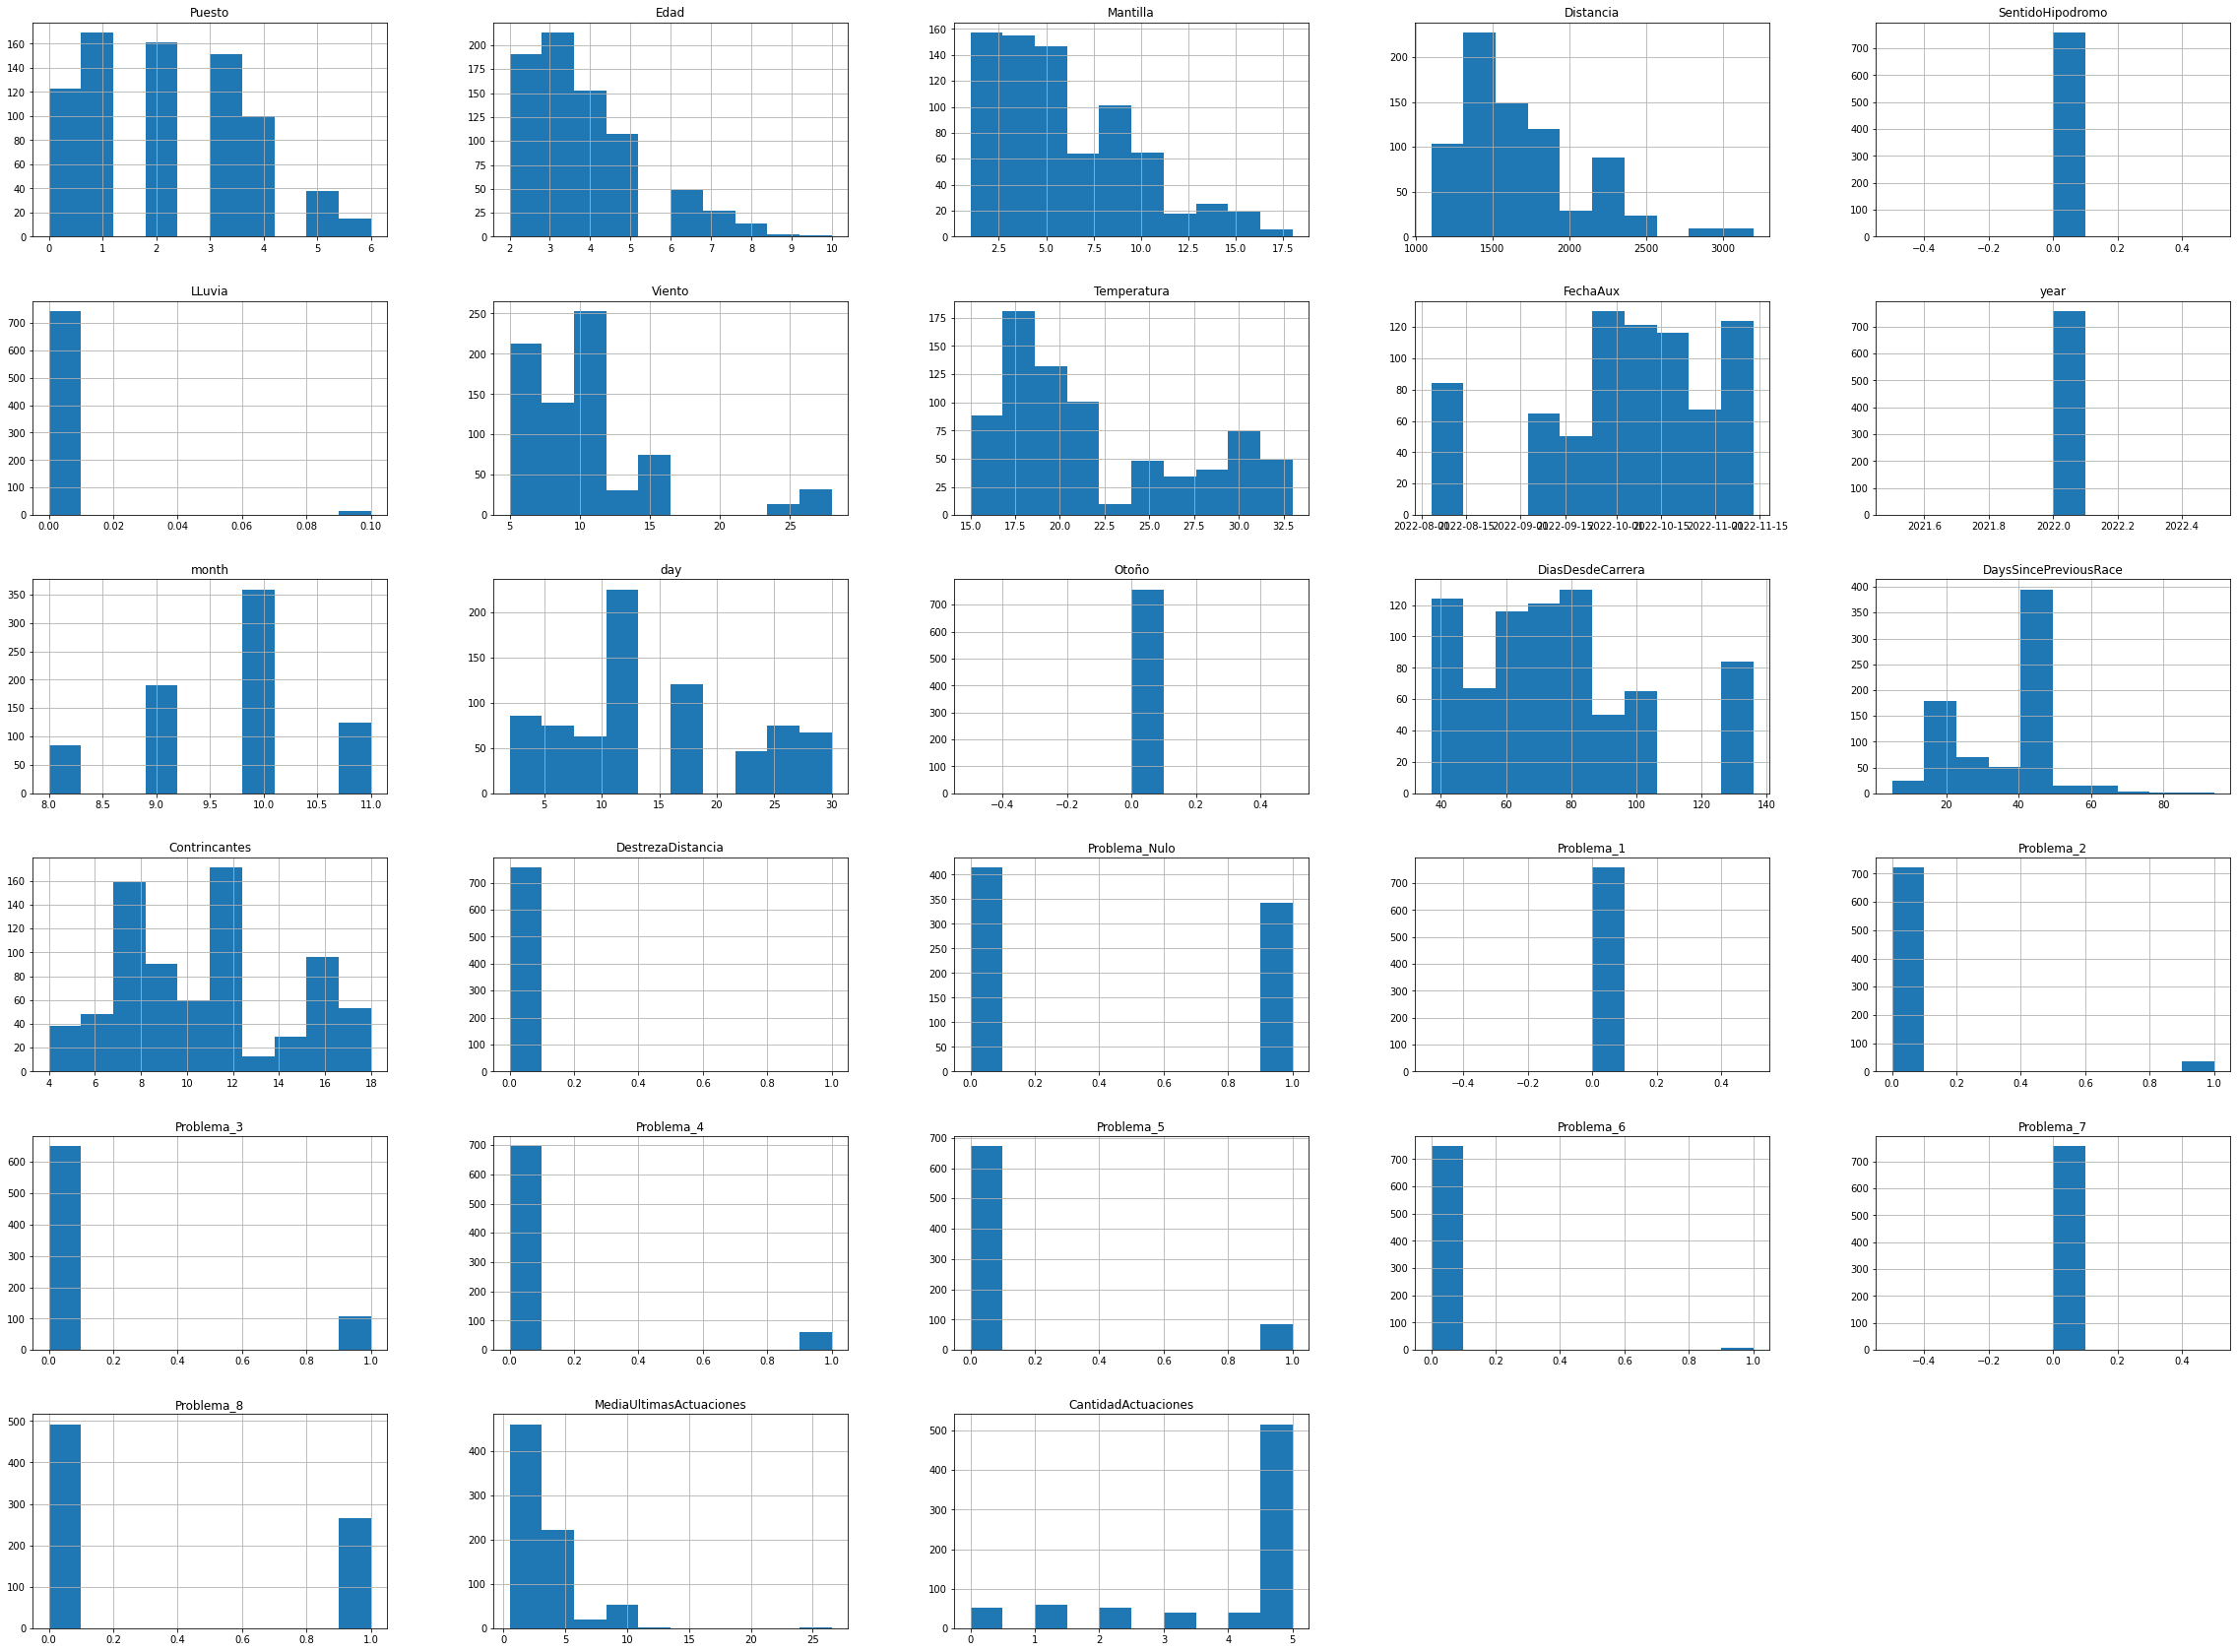

In [175]:
train.hist(figsize = (40,30))

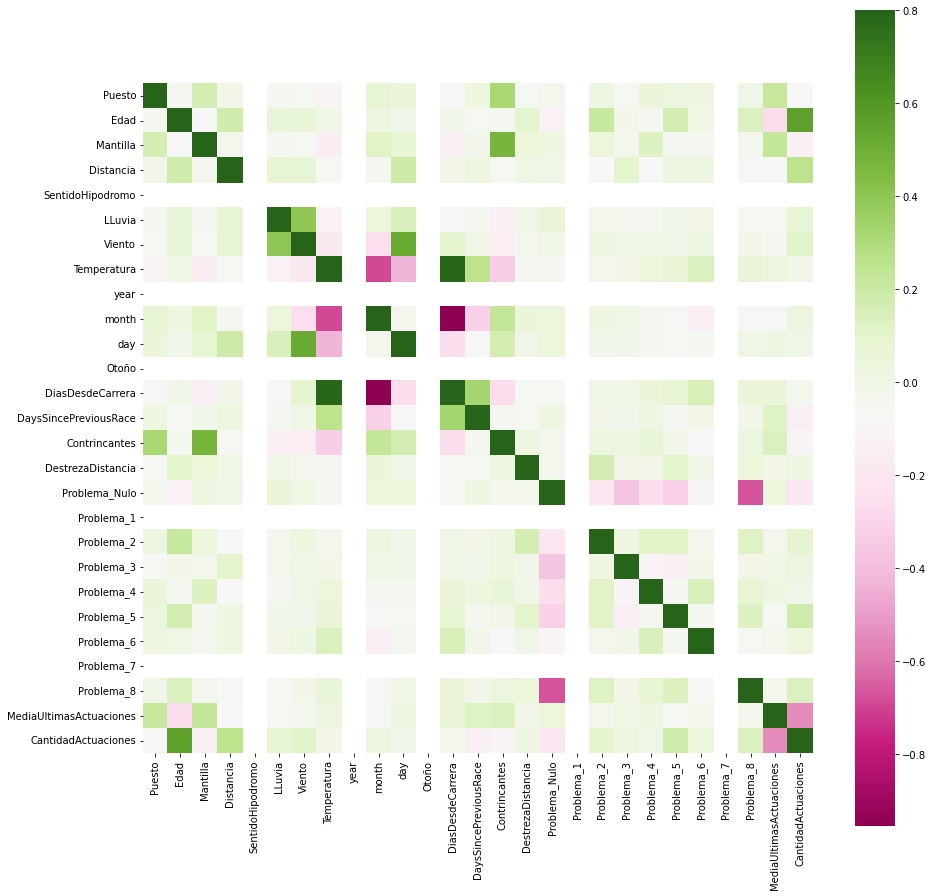

In [176]:
C_mat = train.corr()
fig = plt.figure(figsize = (15,15))

#Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. 
#The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. 
#A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.

sns.heatmap(C_mat, vmax = .8, square = True, cmap="PiYG")
plt.show()

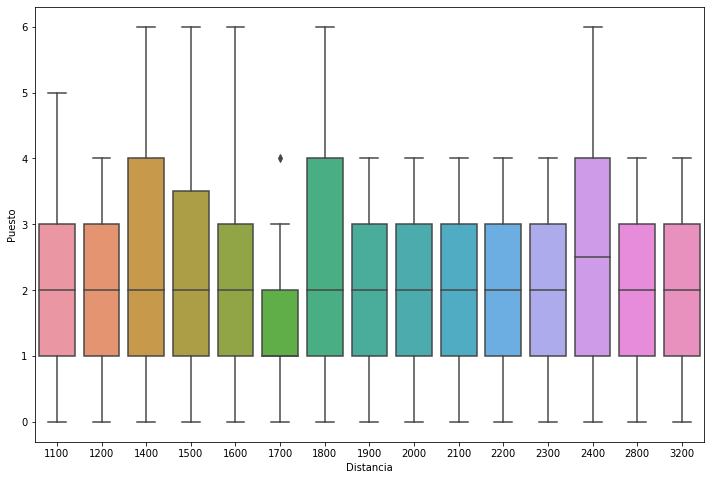

In [177]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x='Distancia', y='Puesto')

plt.show()

In [178]:
print(len(train[(train['Distancia'] < 1600).tolist()]))

print(len(train[((train['Distancia'] >= 1600) & (train['Distancia'] <= 2400) ).tolist()]))

print(len(train[(train['Distancia'] >= 3200).tolist()]))

330
409
9


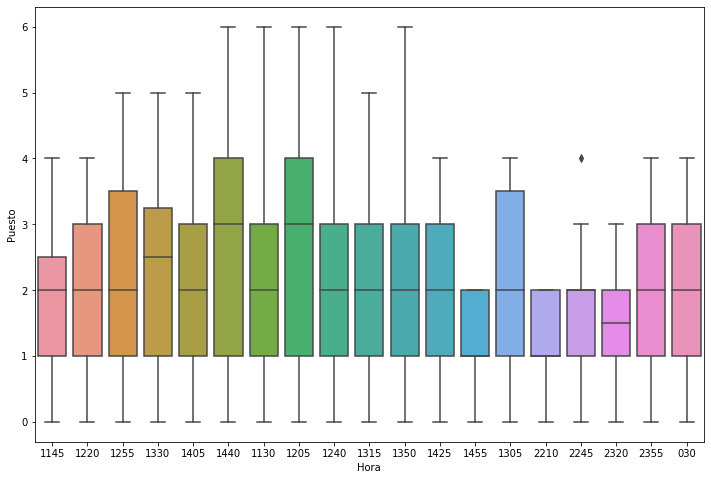

In [179]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x='Hora', y='Puesto')

plt.show()

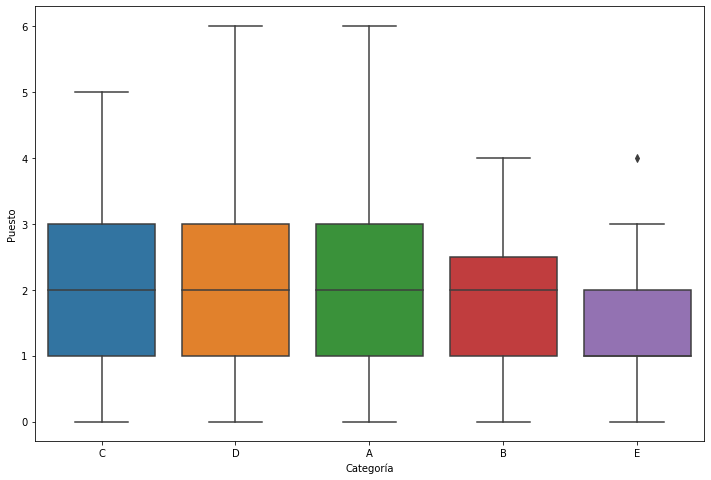

In [180]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x='Categoría', y='Puesto')

plt.show()

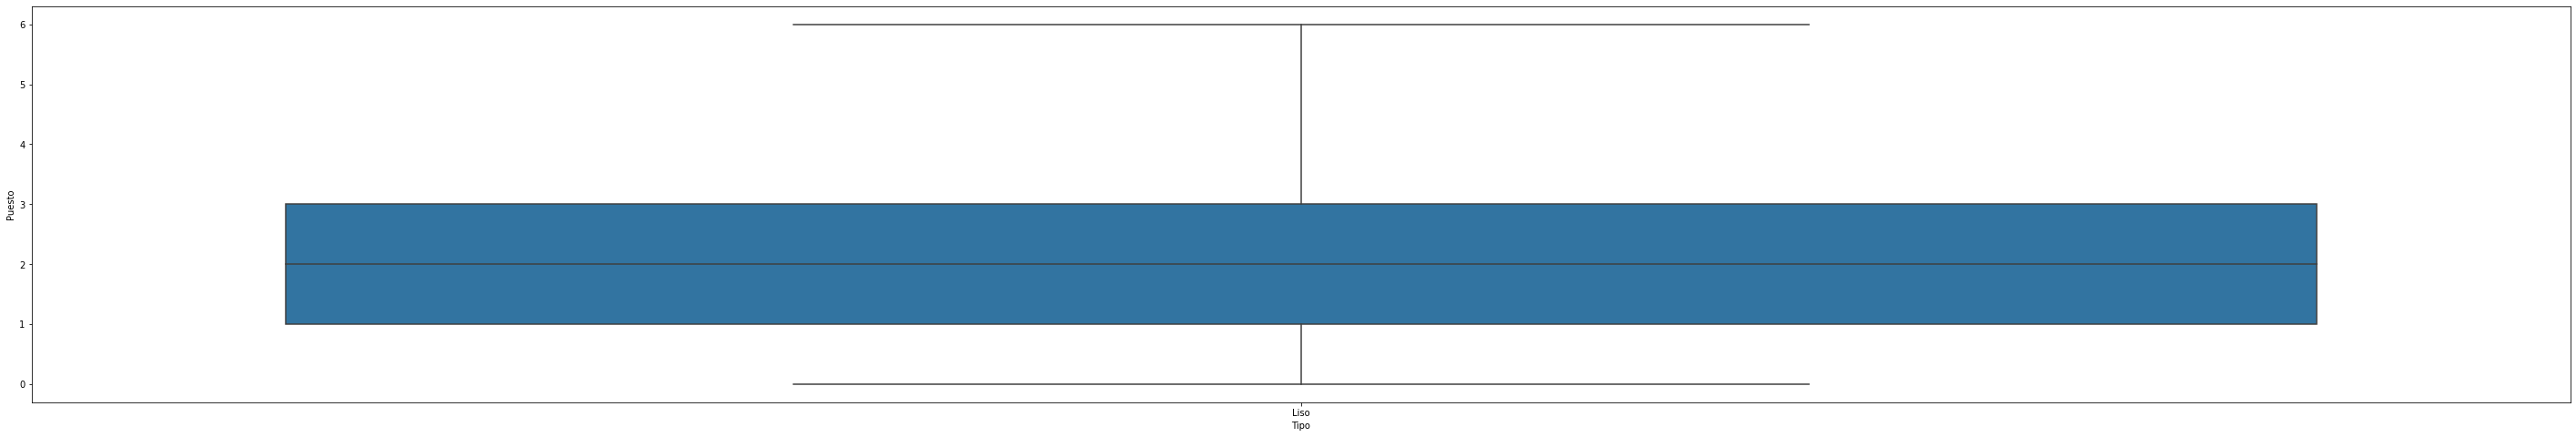

In [181]:
plt.figure(figsize=(50,8))
sns.boxplot(data=train, x='Tipo', y='Puesto')

plt.show()

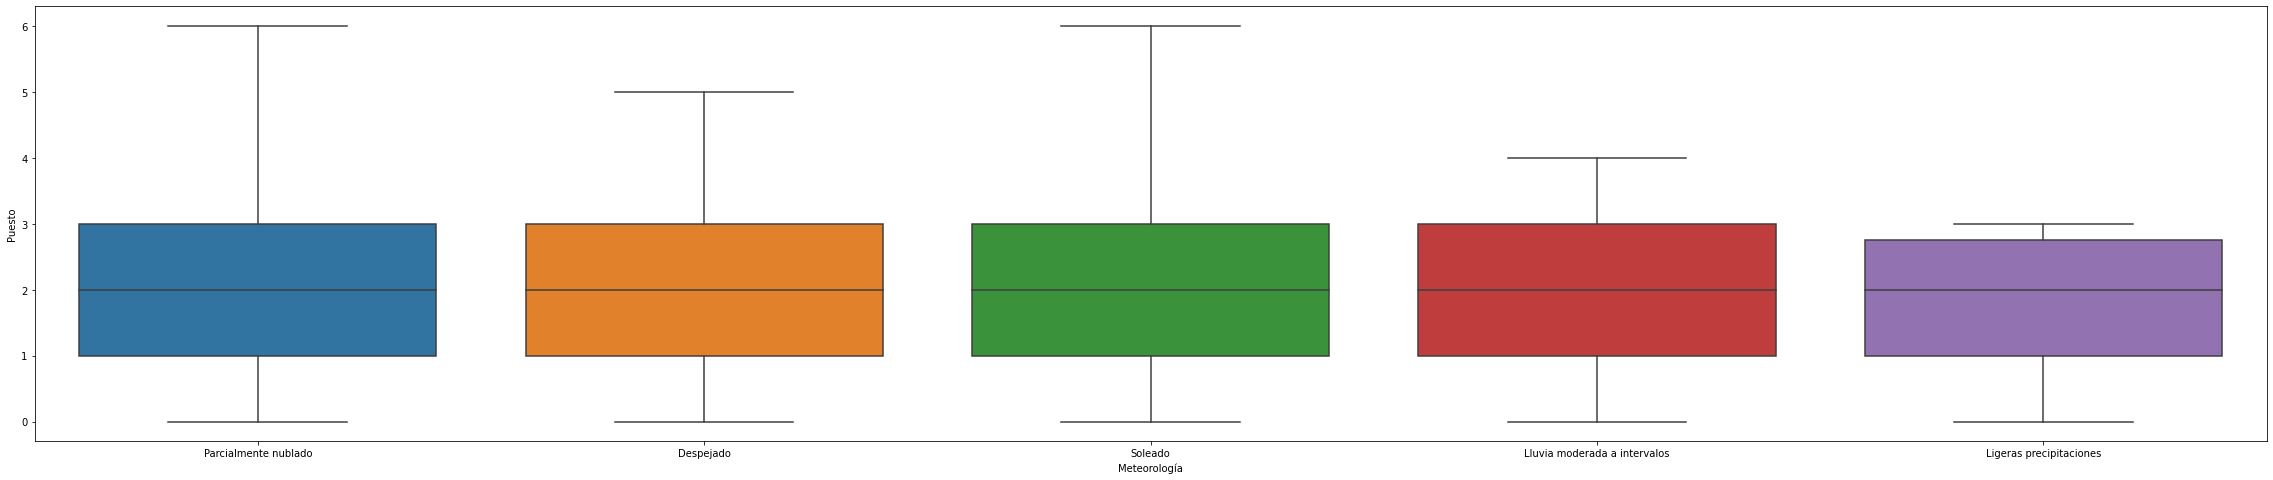

In [182]:
plt.figure(figsize=(40,8))
sns.boxplot(data=train, x='Meteorología', y='Puesto')

plt.show()

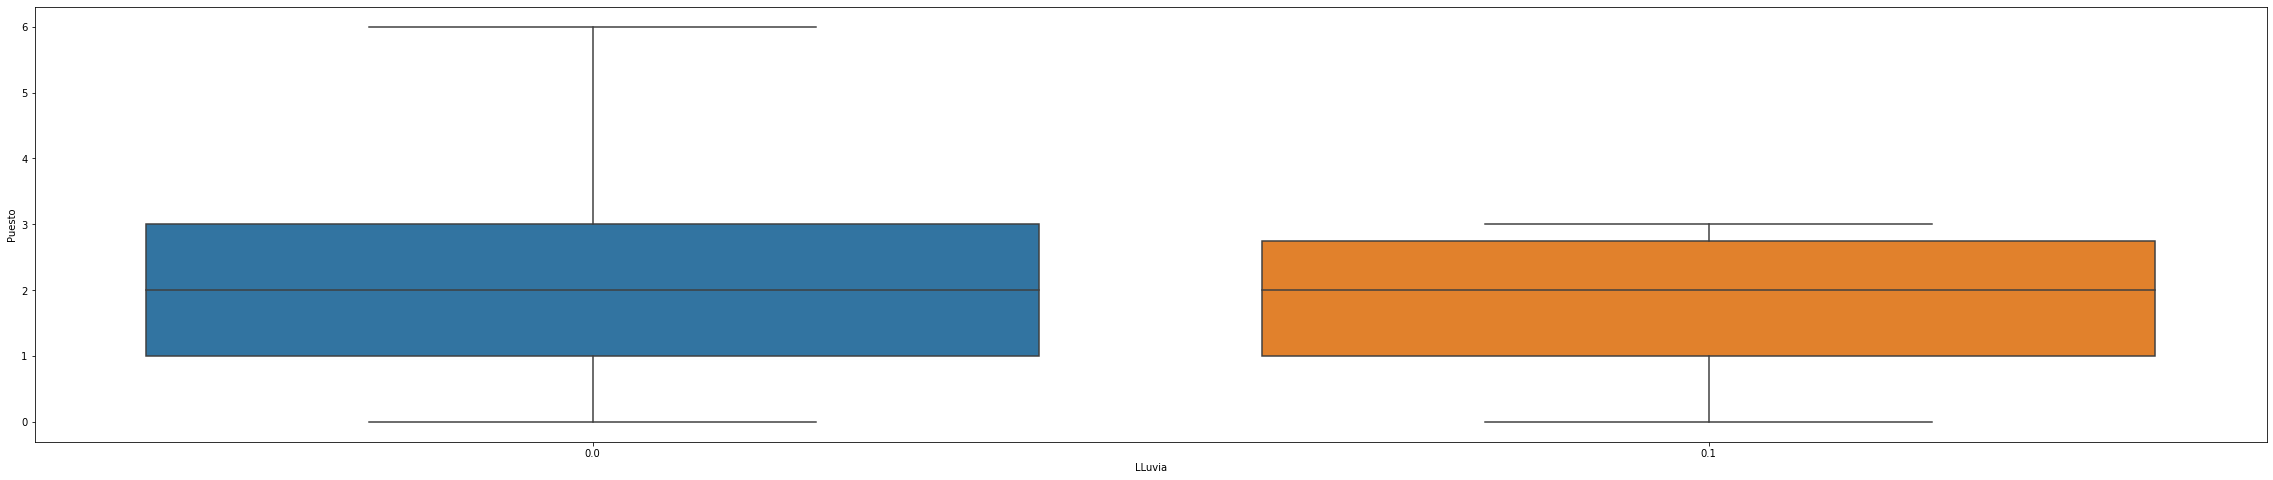

In [183]:
plt.figure(figsize=(40,8))
sns.boxplot(data=train, x='LLuvia', y='Puesto')

plt.show()

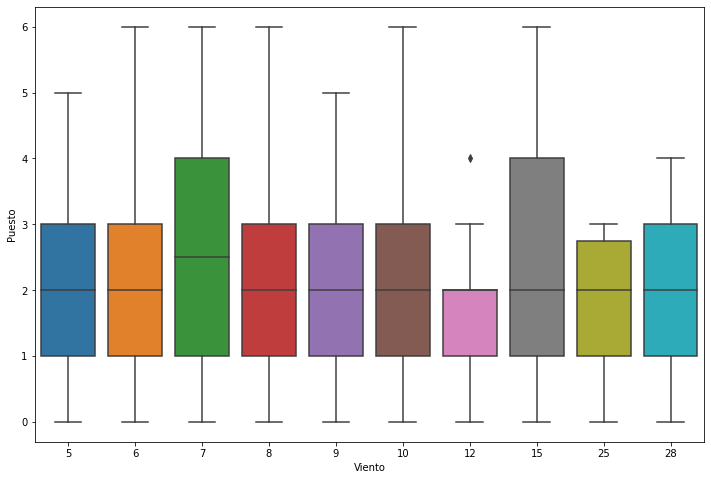

In [184]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x='Viento', y='Puesto')

plt.show()

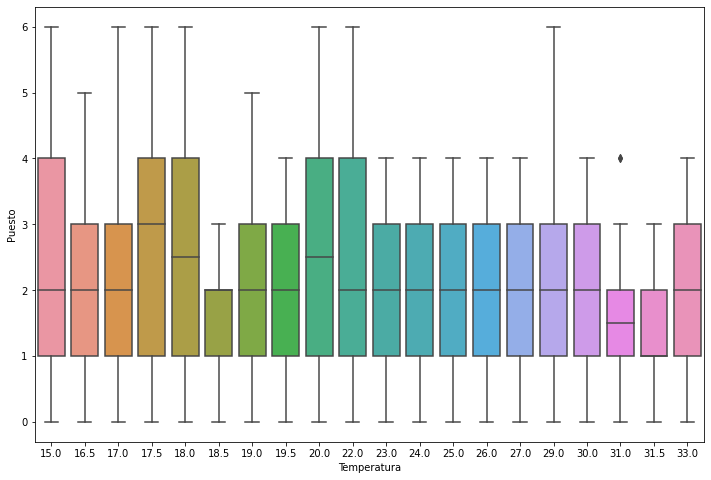

In [185]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x='Temperatura', y='Puesto')

plt.show()

# Preprocesamiento Final

In [186]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Puesto                   757 non-null    int64         
 1   NombreCaballo            757 non-null    object        
 2   Peso                     757 non-null    object        
 3   Edad                     757 non-null    int64         
 4   Mantilla                 757 non-null    int64         
 5   Propietario              757 non-null    object        
 6   Preparador               757 non-null    object        
 7   Jinete                   757 non-null    object        
 8   Problemas                757 non-null    object        
 9   UltimasActuaciones       757 non-null    object        
 10  Fecha                    757 non-null    object        
 11  Hora                     757 non-null    object        
 12  Terreno                  757 non-nul

In [187]:
import sklearn
import sklearn.compose
#Solo ejecutar previo a esto product para separar las palabras
column_transformer_train = sklearn.compose.ColumnTransformer(transformers=[
    ("drop", "drop", ['UltimasActuaciones','Fecha','year','day', 'Problemas','Hora', 'FechaAux', 'Mantilla', 'Terreno', 'Tipo','Categoría', 'Meteorología', 'LLuvia', 'Viento', 'Temperatura', 'Hipodromo', 'Contrincantes']),
    ("scale", sklearn.preprocessing.StandardScaler(), []),
    # ("num", sklearn.preprocessing.MinMaxScaler(), ['Distancia', 'Edad', 'Peso']),
    ("one-hot", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"), ['NombreCaballo','Propietario', 'Preparador', 'Jinete']),
], remainder='passthrough');

# column_transformer = sklearn.compose.ColumnTransformer(transformers=[
#     ("drop", "drop", ['UltimasActuaciones','Fecha','year','day', 'Problemas','Hora']),
#     ("scale", sklearn.preprocessing.StandardScaler(), []),
#     ("num", sklearn.preprocessing.MinMaxScaler(), ['Distancia', 'Edad', 'Peso']),
#     ("one-hot", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"), ['NombreCaballo', 'Mantilla','Propietario', 'Preparador', 'Jinete', 'FechaAux', 'Terreno', 'Tipo','Categoría', 'Meteorología', 'LLuvia', 'Viento', 'TemperaturaMax', 'TemperaturaMin', 'Hipodromo']),
# ], remainder='passthrough');

In [188]:
train = train.reset_index()
X=train
X = X.drop(["Puesto"], axis = 1)

In [189]:
X_transform = column_transformer_train.fit_transform(X)

In [190]:
column_transformer_train.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['one-hot__x0_AMERICANO',
 'one-hot__x0_ARETHA',
 'one-hot__x0_ASTRAL',
 'one-hot__x0_ASTURIAS',
 'one-hot__x0_ATLANTICO',
 'one-hot__x0_AUSTRALIA CAPE',
 'one-hot__x0_CAROLINA WEST',
 'one-hot__x0_CHUSQUEZ',
 'one-hot__x0_EL CANEY',
 'one-hot__x0_EMBAT',
 'one-hot__x0_FAITH ROSE',
 'one-hot__x0_FINELY TUNED',
 'one-hot__x0_FORTUNATO',
 'one-hot__x0_HIGHLAND MARKET',
 'one-hot__x0_IZAMAL',
 'one-hot__x0_KANE ORE',
 'one-hot__x0_LA MAL AMADA',
 'one-hot__x0_LADY RAZALMA',
 'one-hot__x0_MAITRE YODA',
 'one-hot__x0_MEDICEAN BLUE',
 'one-hot__x0_MONTERREDONDO',
 'one-hot__x0_ORBAYO',
 'one-hot__x0_OtherHorse',
 'one-hot__x0_PIU BIRCH',
 'one-hot__x0_ROBAYERA',
 'one-hot__x0_ROBLON',
 'one-hot__x0_RUMBERA',
 'one-hot__x0_SANCTI PETRI',
 'one-hot__x0_SANS ATTENDRE',
 'one-hot__x0_SEVERUS',
 'one-hot__x0_SHELBY',
 'one-hot__x0_SOFUNNY',
 'one-hot__x0_SOGALINDA',
 'one-hot__x0_STARSHADOW',
 'one-hot__x0_THE GAME',
 'one-hot__x0_TRES DE TREBOL',
 'one-hot__x0_UPSDAWN',
 'one-hot__x0_UPSILON',
 

In [191]:
train 
X_transform
X = X_transform       #Nos quedamos con todo menos la columna objetivo, en este caso 'price'
y = train["Puesto"]

In [192]:
train[['NombreCaballo','MediaUltimasActuaciones']].head(128)

,NombreCaballo,MediaUltimasActuaciones
0,OtherHorse,1.456720
1,OtherHorse,2.500000
2,OtherHorse,0.500000
3,OtherHorse,5.750000
4,OtherHorse,5.000000
5,OtherHorse,3.000000
6,OtherHorse,2.250000
7,OtherHorse,1.000000
8,OtherHorse,2.896886
9,OtherHorse,4.428258


In [193]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1920)

In [194]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor

#Regresión lineal
linear = LinearRegression()
linear.fit(X_train, y_train)

#Regresión de Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

#LASSO

lasso = linear_model.Lasso()
lasso.fit(X_train, y_train)

#ElasticNet

elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train);


reg = SGDRegressor(max_iter=50, random_state=43)
reg.fit(X_train, y_train);

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [195]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

for i in range(0, 11):
  for j in range(0, 11):
    #     xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror', reg_alpha=i*0.1, reg_lambda=j*0.1, verbosity=0, random_state=42, eta=0.2, tree_method="exact") 148

    elasticnet = ElasticNet(alpha=i*0.1, l1_ratio=j*0.1)
    elasticnet.fit(X_train, y_train)
    print('ElasticNet (train): ' + str(mean_absolute_error(y_train, elasticnet.predict(X_train))))
    print(f'{i} {j} ' + str(mean_absolute_error(y_test, elasticnet.predict(X_test))))

<ipython-input-195-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 335.96592913662266, tolerance: 0.1099412228796844
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-195-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.9028421342012
0 0 1.337854470890544


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 335.96592913662266, tolerance: 0.1099412228796844
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-195-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.9028421342012
0 1 1.337854470890544


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 335.96592913662266, tolerance: 0.1099412228796844
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-195-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.9028421342012
0 2 1.337854470890544


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 335.96592913662266, tolerance: 0.1099412228796844
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-195-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.9028421342012
0 3 1.337854470890544


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 335.96592913662266, tolerance: 0.1099412228796844
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-195-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.9028421342012
0 4 1.337854470890544


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 335.96592913662266, tolerance: 0.1099412228796844
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-195-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.9028421342012
0 5 1.337854470890544


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 335.96592913662266, tolerance: 0.1099412228796844
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-195-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.9028421342012
0 6 1.337854470890544


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 335.96592913662266, tolerance: 0.1099412228796844
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-195-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.9028421342012
0 7 1.337854470890544


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 335.96592913662266, tolerance: 0.1099412228796844
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-195-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.9028421342012
0 8 1.337854470890544


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 335.96592913662266, tolerance: 0.1099412228796844
  model = cd_fast.sparse_enet_coordinate_descent(
<ipython-input-195-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)


ElasticNet (train): 0.9028421342012
0 9 1.337854470890544


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 335.96592913662266, tolerance: 0.1099412228796844
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 0.9028421342012
0 10 1.337854470890544


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 481.71516347357425, tolerance: 0.1099412228796844
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 1.1278902947311038
1 0 1.2588753532092933
ElasticNet (train): 1.1586242277216674
1 1 1.2703886504288764
ElasticNet (train): 1.172747685633271
1 2 1.279803035542373
ElasticNet (train): 1.179515617955745
1 3 1.2862085445407676
ElasticNet (train): 1.1835580951617048
1 4 1.2896456948117856
ElasticNet (train): 1.1864827023057116
1 5 1.2916861282045562
ElasticNet (train): 1.1889347949131392
1 6 1.294728858604231
ElasticNet (train): 1.1905292531170053
1 7 1.2966178482749586
ElasticNet (train): 1.1908313908588244
1 8 1.2972420079716211
ElasticNet (train): 1.1911352950059337
1 9 1.2978992462309085
ElasticNet (train): 1.191453632575042
1 10 1.2984353402719253


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 494.2958901863979, tolerance: 0.1099412228796844
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 1.1490109332072187
2 0 1.2707036308483781
ElasticNet (train): 1.177554578190977
2 1 1.2853444849448505
ElasticNet (train): 1.185534514762547
2 2 1.2922748768418524
ElasticNet (train): 1.1898756724625537
2 3 1.2958516486265208
ElasticNet (train): 1.1912708341682496
2 4 1.297906304858549
ElasticNet (train): 1.191906001666409
2 5 1.2990287662978266
ElasticNet (train): 1.1925534176492483
2 6 1.3000184740560738
ElasticNet (train): 1.1932683254246774
2 7 1.3010680307354323
ElasticNet (train): 1.1941175811849396
2 8 1.3022792404028065
ElasticNet (train): 1.1949759944614637
2 9 1.3034994251260488
ElasticNet (train): 1.195858534252991
2 10 1.3047782620770245


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 500.2738086253512, tolerance: 0.1099412228796844
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 1.159309534776906
3 0 1.2769302962424458
ElasticNet (train): 1.1841809869534867
3 1 1.291935964291172
ElasticNet (train): 1.1905150416843113
3 2 1.2966605207637456
ElasticNet (train): 1.1920352211337515
3 3 1.2991150970815748
ElasticNet (train): 1.1929975575271043
3 4 1.3005737820753138
ElasticNet (train): 1.1942009820906392
3 5 1.3023155148506882
ElasticNet (train): 1.1954623681348502
3 6 1.304129980480337
ElasticNet (train): 1.1967860160824
3 7 1.3060947972556627
ElasticNet (train): 1.1981873375956085
3 8 1.3081354228628863
ElasticNet (train): 1.1996663234491016
3 9 1.3103114668182445
ElasticNet (train): 1.2011915427797994
3 10 1.3125114039255228


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 503.9716209366382, tolerance: 0.1099412228796844
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 1.1654966275989118
4 0 1.281022640493458
ElasticNet (train): 1.1879004236719728
4 1 1.2949596059998358
ElasticNet (train): 1.1921604427668164
4 2 1.2991513420893008
ElasticNet (train): 1.193476768385327
4 3 1.3011839111045864
ElasticNet (train): 1.1951025209966673
4 4 1.3035218030727964
ElasticNet (train): 1.1968063411547223
4 5 1.3060457040076354
ElasticNet (train): 1.198657306145054
4 6 1.3087487697091478
ElasticNet (train): 1.200609026042133
4 7 1.3116079983207714
ElasticNet (train): 1.2026567179961198
4 8 1.3152385800703141
ElasticNet (train): 1.204746411083866
4 9 1.3196405789204542
ElasticNet (train): 1.2068711346873633
4 10 1.324108223978451


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 506.5745472061813, tolerance: 0.1099412228796844
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 1.1696892065834272
5 0 1.2839796879924814
ElasticNet (train): 1.190508283432879
5 1 1.2968236408914644
ElasticNet (train): 1.1932120338190613
5 2 1.30067842261657
ElasticNet (train): 1.195163152025307
5 3 1.30353001875958
ElasticNet (train): 1.1972661675771363
5 4 1.306643903370641
ElasticNet (train): 1.199594565922231
5 5 1.3100386690008987
ElasticNet (train): 1.2020411063630208
5 6 1.3138520986803814
ElasticNet (train): 1.2045883638125445
5 7 1.3192329090834771
ElasticNet (train): 1.2071891797672425
5 8 1.3247119003535086
ElasticNet (train): 1.209949400011215
5 9 1.3302921550794566
ElasticNet (train): 1.2128394828020956


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 508.55411028990767, tolerance: 0.1099412228796844
  model = cd_fast.sparse_enet_coordinate_descent(


5 10 1.3361326845607444
ElasticNet (train): 1.1727485285760766
6 0 1.286281868937618
ElasticNet (train): 1.192049163076692
6 1 1.2987521157023147
ElasticNet (train): 1.1944360001364152
6 2 1.3024068025238895
ElasticNet (train): 1.1968465242047335
6 3 1.3059475482257508
ElasticNet (train): 1.1995624432909617
6 4 1.3099074344814525
ElasticNet (train): 1.2024416099527098
6 5 1.314612862867672
ElasticNet (train): 1.2054478822653945
6 6 1.320975306094185
ElasticNet (train): 1.2085800249438334
6 7 1.3274748149136135
ElasticNet (train): 1.2118869791056097
6 8 1.3341759167395832
ElasticNet (train): 1.2155265677961276
6 9 1.341344276326653
ElasticNet (train): 1.2193817626681192
6 10 1.3486772715584012


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 510.13885500122456, tolerance: 0.1099412228796844
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 1.1751244119987474
7 0 1.2881600736613434
ElasticNet (train): 1.1931004821801232
7 1 1.3002545671113446
ElasticNet (train): 1.1956667432205654
7 2 1.3041123454407906
ElasticNet (train): 1.1986234749786553
7 3 1.308434152391767
ElasticNet (train): 1.2018585094899945
7 4 1.3132877768941666
ElasticNet (train): 1.205281953165349
7 5 1.3205531281795129
ElasticNet (train): 1.2088623162174454
7 6 1.327997501950038
ElasticNet (train): 1.2126967763766399
7 7 1.3357794322977288
ElasticNet (train): 1.2169520654205894
7 8 1.3440389926817466
ElasticNet (train): 1.2214042630141873
7 9 1.3525170787820704
ElasticNet (train): 1.2241678099142028
7 10 1.3581450773500072


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511.45444172318395, tolerance: 0.1099412228796844
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 1.177040212996122
8 0 1.2897431274517053
ElasticNet (train): 1.1938731394107138
8 1 1.3013722585587157
ElasticNet (train): 1.1968861050783555
8 2 1.3058495744039817
ElasticNet (train): 1.2004017184122524
8 3 1.310983751883517
ElasticNet (train): 1.2041572921369454
8 4 1.3180919262025765
ElasticNet (train): 1.2080967558832298
8 5 1.3263905464601689
ElasticNet (train): 1.2123489963066847
8 6 1.3350411083545328
ElasticNet (train): 1.2170972443909458
8 7 1.3442980370893614
ElasticNet (train): 1.2220932637192163
8 8 1.353829093422731
ElasticNet (train): 1.224064301307732
8 9 1.358256025843164
ElasticNet (train): 1.2236684212196274
8 10 1.3586912694922098


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 512.5763510083278, tolerance: 0.1099412228796844
  model = cd_fast.sparse_enet_coordinate_descent(


ElasticNet (train): 1.1786755878996111
9 0 1.2911039643797344
ElasticNet (train): 1.194662859782762
9 1 1.3024754000474856
ElasticNet (train): 1.1981745971461921
9 2 1.307611932244056
ElasticNet (train): 1.2021564524921724
9 3 1.3137465603479979
ElasticNet (train): 1.2064040326395755
9 4 1.3227987326391935
ElasticNet (train): 1.210938044163165
9 5 1.3321278462838824
ElasticNet (train): 1.2160372470545102
9 6 1.3422485684844632
ElasticNet (train): 1.2215126840244936
9 7 1.3527238898596439
ElasticNet (train): 1.2240597501904662
9 8 1.3582581762865815
ElasticNet (train): 1.2236152177163633
9 9 1.358747360638933
ElasticNet (train): 1.2231689891211421
9 10 1.3592374915507583
ElasticNet (train): 1.1801175065982115
10 0 1.2923145970232963
ElasticNet (train): 1.1954436021347041
10 1 1.3035463329093873
ElasticNet (train): 1.1994556039268982
10 2 1.3094123354481815
ElasticNet (train): 1.2039015590953113
10 3 1.3173919920335317
ElasticNet (train): 1.208647128699597
10 4 1.3274110661286733
Elastic

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 513.5530055560673, tolerance: 0.1099412228796844
  model = cd_fast.sparse_enet_coordinate_descent(


In [196]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

for i in range(0, 11):
  for j in range(0, 11):
    #     xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror', reg_alpha=i*0.1, reg_lambda=j*0.1, verbosity=0, random_state=42, eta=0.2, tree_method="exact") 148

    xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror', reg_alpha=i*0.1, reg_lambda=j*0.1, verbosity=0, random_state=42, eta=0.2, tree_method="exact") #subsample ojo
    xgb_model.fit(X_train, y_train)
    print('ElasticNet (train): ' + str(mean_absolute_error(y_train, xgb_model.predict(X_train))))
    print(f'{i} {j} ' + str(mean_absolute_error(y_test, xgb_model.predict(X_test))))

ElasticNet (train): 0.9103998002215955
0 0 1.2951698546409607
ElasticNet (train): 0.9121766239698587
0 1 1.300767377614975
ElasticNet (train): 0.9104476308916682
0 2 1.2975009741783141
ElasticNet (train): 0.9131557360673562
0 3 1.29533113861084
ElasticNet (train): 0.9130028991774459
0 4 1.3036385104656218
ElasticNet (train): 0.9096947264154047
0 5 1.2999710421562194
ElasticNet (train): 0.9183729937560929
0 6 1.2921058421134948
ElasticNet (train): 0.9220379071357923
0 7 1.2988560318946838
ElasticNet (train): 0.9077043289968953
0 8 1.2981850728988646
ElasticNet (train): 0.9166100664721908
0 9 1.2962614097595215
ElasticNet (train): 0.9164038267596468
0 10 1.2974017872810364
ElasticNet (train): 0.9038803937167106
1 0 1.3136758151054382
ElasticNet (train): 0.9049653834139807
1 1 1.3047720527648925
ElasticNet (train): 0.9133949045833987
1 2 1.3001749293804168
ElasticNet (train): 0.9124090573961683
1 3 1.31005406165123
ElasticNet (train): 0.9047669987001362
1 4 1.2986258039474488
ElasticNet (

In [197]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror', reg_alpha=7*0.1, reg_lambda=4*0.1, verbosity=0, random_state=42, eta=0.2, tree_method="exact")

xgb_model.fit(X, y)
#print('Lineal (train): ' + str(mean_absolute_error(y_train, xgb_model.predict(X))))
#print('Lineal (test): ' + str(mean_absolute_error(y_test, xgb_model.predict(X_test))))

XGBRegressor(eta=0.2, objective='reg:squarederror', random_state=42,
             reg_alpha=0.7000000000000001, reg_lambda=0.4, tree_method='exact',
             verbosity=0)

In [198]:
!pip install catboost
import catboost as cb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [199]:
params = {"depth": 10, "learning_rate": 0.5, "iterations": 50, "l2_leaf_reg": 5} #Iterations CatBoost
model_cat_tun = cb.CatBoostClassifier(**params)
model_cat_tun.fit(X,y)

0:	learn: 1.8448877	total: 84.4ms	remaining: 4.14s
1:	learn: 1.7682381	total: 159ms	remaining: 3.81s
2:	learn: 1.6979468	total: 244ms	remaining: 3.83s
3:	learn: 1.6421566	total: 328ms	remaining: 3.78s
4:	learn: 1.5845647	total: 402ms	remaining: 3.62s
5:	learn: 1.5369004	total: 501ms	remaining: 3.67s
6:	learn: 1.4925118	total: 684ms	remaining: 4.2s
7:	learn: 1.4578697	total: 846ms	remaining: 4.44s
8:	learn: 1.4174278	total: 1.04s	remaining: 4.75s
9:	learn: 1.3965480	total: 1.22s	remaining: 4.87s
10:	learn: 1.3572059	total: 1.34s	remaining: 4.74s
11:	learn: 1.3159674	total: 1.42s	remaining: 4.5s
12:	learn: 1.2748090	total: 1.51s	remaining: 4.31s
13:	learn: 1.2392224	total: 1.6s	remaining: 4.11s
14:	learn: 1.2006381	total: 1.68s	remaining: 3.93s
15:	learn: 1.1650875	total: 1.77s	remaining: 3.76s
16:	learn: 1.1294140	total: 1.85s	remaining: 3.59s
17:	learn: 1.1007956	total: 1.92s	remaining: 3.42s
18:	learn: 1.0658284	total: 2.01s	remaining: 3.27s
19:	learn: 1.0343983	total: 2.15s	remaining

In [200]:
from sklearn.metrics import mean_absolute_error

print('Lineal (train): ' + str(mean_absolute_error(y_train, linear.predict(X_train))))
print('Lineal (test): ' + str(mean_absolute_error(y_test, linear.predict(X_test))))

print('---')

print('Ridge (train): ' + str(mean_absolute_error(y_train, ridge.predict(X_train))))
print('Ridge (test): ' + str(mean_absolute_error(y_test, ridge.predict(X_test))))

print('---')

print('LASSO (train): ' + str(mean_absolute_error(y_train, lasso.predict(X_train))))
print('LASSO (test): ' + str(mean_absolute_error(y_test, lasso.predict(X_test))))

print('---')

print('ElasticNet (train): ' + str(mean_absolute_error(y_train, elasticnet.predict(X_train))))
print('ElasticNet (test): ' + str(mean_absolute_error(y_test, elasticnet.predict(X_test))))

print('---')

print('SGD (train): ' + str(mean_absolute_error(y_train, reg.predict(X_train))))
print('SGD (test): ' + str(mean_absolute_error(y_test, reg.predict(X_test))))

Lineal (train): 0.9028850274850805
Lineal (test): 1.335001565668233
---
Ridge (train): 0.9753792057581869
Ridge (test): 1.2815609680885665
---
LASSO (train): 1.2226978883151942
LASSO (test): 1.3596810188568054
---
ElasticNet (train): 1.2226978883151942
ElasticNet (test): 1.3596810188568054
---
SGD (train): 1956110423856417.2
SGD (test): 2002481948676912.8


In [201]:
from sklearn.metrics import accuracy_score

print('Lineal (train): ' + str(linear.score(X_train, y_train)))
print('Lineal (test): ' + str(linear.score(X_test, y_test)))
print('---')
print('Ridge (train): ' + str(ridge.score(X_train, y_train)))
print('Ridge (test): ' + str(ridge.score(X_test, y_test)))
print('---')
print('LASSO (train): ' + str(lasso.score(X_train, y_train)))
print('LASSO (test): ' + str(lasso.score(X_test, y_test)))
print('---')
print('ElasticNet (train): ' + str(elasticnet.score(X_train, y_train)))
print('ElasticNet (test): ' + str(elasticnet.score(X_test, y_test)))

Lineal (train): 0.3888262108880687
Lineal (test): -0.07716943367481188
---
Ridge (train): 0.33214287841514645
Ridge (test): 0.05001608973712701
---
LASSO (train): 0.007251217692580081
LASSO (test): 0.0048035086549249595
---
ElasticNet (train): 0.007251217692580081
ElasticNet (test): 0.0048035086549249595


In [202]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print('Lineal (train): ' + str(sqrt(mean_squared_error(y_train, linear.predict(X_train)))))
print('Lineal (test): ' + str(sqrt(mean_squared_error(y_test, linear.predict(X_test)))))
print('---')
print('Ridge (train): ' + str(sqrt(mean_squared_error(y_train, ridge.predict(X_train)))))
print('Ridge (test): ' + str(sqrt(mean_squared_error(y_test, ridge.predict(X_test)))))
print('---')
print('LASSO (train): ' + str(sqrt(mean_squared_error(y_train, lasso.predict(X_train)))))
print('LASSO (test): ' + str(sqrt(mean_squared_error(y_test, lasso.predict(X_test)))))
print('---')
print('ElasticNet (train): ' + str(sqrt(mean_squared_error(y_train, elasticnet.predict(X_train)))))
print('ElasticNet (test): ' + str(sqrt(mean_squared_error(y_test, elasticnet.predict(X_test)))))

Lineal (train): 1.1512208918165758
Lineal (test): 1.7092821396878295
---
Ridge (train): 1.2034223769221757
Ridge (test): 1.6052026536318584
---
LASSO (train): 1.4672225175345628
LASSO (test): 1.6429568681340774
---
ElasticNet (train): 1.4672225175345628
ElasticNet (test): 1.6429568681340774


# Optimización
---

Linear
---

In [203]:
from sklearn.model_selection import GridSearchCV

In [204]:
fit_intercept = [True, False]
copy_x = [True, False]
normalize = [True, False]

In [205]:
linear_Grid = GridSearchCV(
  estimator = LinearRegression(),
  param_grid = dict(fit_intercept = fit_intercept, copy_X = copy_x, normalize = normalize),
  cv = 5
)
linear_Grid.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [206]:
linear_Grid.best_estimator_

LinearRegression(normalize=True)

In [207]:
linear_Grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [208]:
linear_Grid.best_score_

-0.3477893754513567

In [209]:
linear = LinearRegression(fit_intercept=True, normalize=False, copy_X=True)
linear.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(normalize=False)

In [210]:
print("MAE: ")
print('Train: ' + str(mean_absolute_error(y_train, linear.predict(X_train))))
print('Test: ' + str(mean_absolute_error(y_test, linear.predict(X_test))))
print("---------------------------------------")
print("R^2: ")
print("Train: " + str(linear.score(X_train, y_train)))
print("Test: " + str(linear.score(X_test, y_test)))
print("---------------------------------------")
print("RMST: ")
print('Train: ' + str(sqrt(mean_squared_error(y_train, linear.predict(X_train)))))
print('Test: ' + str(sqrt(mean_squared_error(y_train, linear.predict(X_train)))))

MAE: 
Train: 0.9028850274850805
Test: 1.335001565668233
---------------------------------------
R^2: 
Train: 0.3888262108880687
Test: -0.07716943367481188
---------------------------------------
RMST: 
Train: 1.1512208918165758
Test: 1.1512208918165758


Se puede observar que no mejora ya que los parámetros que nos da el GridSearch son los mismos que tiene de base.

Ridge
---

In [211]:
ridge_Grid = GridSearchCV(
  estimator = Ridge(),
  param_grid = dict(alpha= np.linspace(0, 1, 50), copy_X = copy_x, fit_intercept=fit_intercept, normalize = normalize),
  cv = 5

)
ridge_Grid.fit(X, y)

Se han truncado las últimas 5000 líneas del flujo de salida.
Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ]),
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [212]:
ridge_Grid.best_estimator_

Ridge(normalize=True)

In [213]:
ridge_Grid.best_params_

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [214]:
ridge_Grid.best_score_

0.022362520492124727

In [215]:
ridge = Ridge(alpha=0.32653061224489793, copy_X=True, fit_intercept=True,
      normalize=True, random_state=1337, solver='auto', tol=0.001)
ridge.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=0.32653061224489793, normalize=True, random_state=1337)

In [216]:
print("MAE: ")
print('Train: ' + str(mean_absolute_error(y_train, ridge.predict(X_train))))
print('Test: ' + str(mean_absolute_error(y_test, ridge.predict(X_test))))
print("---------------------------------------")
print("R^2: ")
print("Train: " + str(ridge.score(X_train, y_train)))
print("Test: " + str(ridge.score(X_test, y_test)))
print("---------------------------------------")
print("RMST: ")
print('Train: ' + str(sqrt(mean_squared_error(y_train, ridge.predict(X_train)))))
print('Test: ' + str(sqrt(mean_squared_error(y_test, ridge.predict(X_test)))))

MAE: 
Train: 0.9710771736393949
Test: 1.298536304868284
---------------------------------------
R^2: 
Train: 0.33277573799376514
Test: 0.03003585643963369
---------------------------------------
RMST: 
Train: 1.2028520619093006
Test: 1.6219952728932197


Parece que empeora ligeramente con respecto a los valores por defecto que tenía antes.

LASSO
---

In [217]:
lasso_Grid = GridSearchCV(estimator = linear_model.Lasso(), param_grid = dict(alpha= np.linspace(0.05,1,20)), cv = 5)
lasso_Grid.fit(X, y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])})

In [218]:
lasso_Grid.best_params_

{'alpha': 0.35}

In [219]:
lasso = linear_model.Lasso(alpha=1, random_state=1337)
lasso.fit(X_train, y_train)

Lasso(alpha=1, random_state=1337)

In [220]:
print("MAE: ")
print('Train: ' + str(mean_absolute_error(y_train, lasso.predict(X_train))))
print('Test: ' + str(mean_absolute_error(y_test, lasso.predict(X_test))))
print("---------------------------------------")
print("R^2: ")
print("Train: " + str(lasso.score(X_train, y_train)))
print("Test: " + str(lasso.score(X_test, y_test)))
print("---------------------------------------")
print("RMST: ")
print('Train: ' + str(sqrt(mean_squared_error(y_train, lasso.predict(X_train)))))
print('Test: ' + str(sqrt(mean_squared_error(y_train, lasso.predict(X_train)))))

MAE: 
Train: 1.2226978883151942
Test: 1.3596810188568054
---------------------------------------
R^2: 
Train: 0.007251217692580081
Test: 0.0048035086549249595
---------------------------------------
RMST: 
Train: 1.4672225175345628
Test: 1.4672225175345628


Se queda igual que con los valores de base.

ElasticNet
---

Este regresor a veces funciona y a veces explota, dejamos guardado los resultados de cuando ha funcionado. De todos modos nos sale el siguiente error:<br>


```
# /usr/local/lib/python3.6/dist-packages/sklearn linear_model_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.
```



In [221]:
elastic_Grid = GridSearchCV(
  estimator = ElasticNet(),
  param_grid = dict(alpha=np.linspace(0.1,1,2), l1_ratio=np.linspace(0,1,2)),
  cv = 5
)
elastic_Grid.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 597.9366180338466, tolerance: 0.13841917355371908
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 619.1500923918794, tolerance: 0.14444892561983472
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 613.0933531965605, tolerance: 0.1382963696369637
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: Converg

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([0.1, 1. ]),
                         'l1_ratio': array([0., 1.])})

In [222]:
elastic_Grid.best_params_

{'alpha': 1.0, 'l1_ratio': 1.0}

In [223]:
elasticnet = ElasticNet(alpha = 1.0, l1_ratio = 1, fit_intercept=True, normalize=False, copy_X=True)
elasticnet.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


ElasticNet(l1_ratio=1, normalize=False)

In [224]:
print("MAE: ")
print('Train: ' + str(mean_absolute_error(y_train, elasticnet.predict(X_train))))
print('Test: ' + str(mean_absolute_error(y_test, elasticnet.predict(X_test))))
print("---------------------------------------")
print("R^2: ")
print("Train: " + str(lasso.score(X_train, y_train)))
print("Test: " + str(lasso.score(X_test, y_test)))
print("---------------------------------------")
print("RMST: ")
print('Train: ' + str(sqrt(mean_squared_error(y_train, elasticnet.predict(X_train)))))
print('Test: ' + str(sqrt(mean_squared_error(y_train, elasticnet.predict(X_train)))))

MAE: 
Train: 1.2226978883151942
Test: 1.3596810188568054
---------------------------------------
R^2: 
Train: 0.007251217692580081
Test: 0.0048035086549249595
---------------------------------------
RMST: 
Train: 1.4672225175345628
Test: 1.4672225175345628


# Validación Cruzada
---

## Linear

MAE

In [225]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

In [226]:
cv_scores_linearMAE = cross_val_score(
                estimator = linear,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_absolute_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_linearMAE}")
print(f"Média métricas de validación cruzada: {cv_scores_linearMAE.mean()}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

Métricas validación cruzada: [-1.36044628 -1.25558364 -1.26022313 -1.46536687 -1.59005947]
Média métricas de validación cruzada: -1.3863358779003492


R^2

In [227]:
cv_scores_linearR = cross_val_score(
                estimator = linear,
                X         = X,
                y         = y,
                scoring   = 'r2',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_linearR}")
print(f"Média métricas de validación cruzada: {cv_scores_linearR.mean()}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

Métricas validación cruzada: [-0.0579797  -0.25618733  0.02609191 -0.38587288 -1.10204429]
Média métricas de validación cruzada: -0.35519845716217163


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


RMSE

In [228]:
cv_scores_linearRMSE = cross_val_score(
                estimator = linear,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_squared_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_linearRMSE}")
print(f"Média métricas de validación cruzada: {cv_scores_linearRMSE.mean()}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

Métricas validación cruzada: [-2.72842818 -2.75633728 -2.53743186 -3.34248154 -3.97213632]
Média métricas de validación cruzada: -3.067363034192203


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


## Ridge
---

MAE

In [229]:
cv_scores_ridgeMAE = cross_val_score(
                estimator = ridge,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_absolute_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_ridgeMAE}")
print(f"Média métricas de validación cruzada: {cv_scores_ridgeMAE.mean()}")

Métricas validación cruzada: [-1.32778081 -1.21040626 -1.2488882  -1.30913972 -1.15525738]
Média métricas de validación cruzada: -1.250294473480984


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

R^2

In [230]:
cv_scores_ridgeR = cross_val_score(
                estimator = ridge,
                X         = X,
                y         = y,
                scoring   = 'r2',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_ridgeR}")
print(f"Média métricas de validación cruzada: {cv_scores_ridgeR.mean()}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

Métricas validación cruzada: [ 0.00951156 -0.05911228  0.08809371 -0.10380153 -0.05896605]
Média métricas de validación cruzada: -0.024854914825443063


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


RMSE

In [231]:
cv_scores_ridgeRMSE = cross_val_score(
                estimator = ridge,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_squared_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_ridgeRMSE}")
print(f"Média métricas de validación cruzada: {cv_scores_ridgeRMSE.mean()}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Métricas validación cruzada: [-2.55437468 -2.32391347 -2.37589162 -2.66217506 -2.00107939]
Média métricas de validación cruzada: -2.3834868437349415


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

## LASSO
---

MAE

In [232]:
cv_scores_lassoMAE = cross_val_score(
                estimator = lasso,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_absolute_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_lassoMAE}")
print(f"Média métricas de validación cruzada: {cv_scores_lassoMAE.mean()}")

Métricas validación cruzada: [-1.35388683 -1.23502737 -1.33767429 -1.29706447 -1.18485417]
Média métricas de validación cruzada: -1.2817014287884163


R^2

In [233]:
cv_scores_lassoR = cross_val_score(
                estimator = lasso,
                X         = X,
                y         = y,
                scoring   = 'r2',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_lassoR}")
print(f"Média métricas de validación cruzada: {cv_scores_lassoR.mean()}")

Métricas validación cruzada: [ 0.00380696 -0.00518962 -0.00204061 -0.00228847 -0.0441597 ]
Média métricas de validación cruzada: -0.009974286362579554


RMSE

In [234]:
cv_scores_lassoRMSE = cross_val_score(
                estimator = lasso,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_squared_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_lassoRMSE}")
print(f"Média métricas de validación cruzada: {cv_scores_lassoRMSE.mean()}")

Métricas validación cruzada: [-2.56908629 -2.20559589 -2.61072867 -2.41734343 -1.97310052]
Média métricas de validación cruzada: -2.3551709604389495


## ElasticNet
---

MAE

In [235]:
cv_scores_netMAE = cross_val_score(
                estimator = elasticnet,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_absolute_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_netMAE}")
print(f"Média métricas de validación cruzada: {cv_scores_netMAE.mean()}")

Métricas validación cruzada: [-1.35388683 -1.23502737 -1.33767429 -1.29706447 -1.18485417]
Média métricas de validación cruzada: -1.2817014287884163


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

R^2

In [236]:
cv_scores_netR = cross_val_score(
                estimator = elasticnet,
                X         = X,
                y         = y,
                scoring   = 'r2',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_netR}")
print(f"Média métricas de validación cruzada: {cv_scores_netR.mean()}")

Métricas validación cruzada: [ 0.00380696 -0.00518962 -0.00204061 -0.00228847 -0.0441597 ]
Média métricas de validación cruzada: -0.009974286362579554


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

RMSE

In [237]:
cv_scores_netRMSE = cross_val_score(
                estimator = elasticnet,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_squared_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_netRMSE}")
print(f"Média métricas de validación cruzada: {cv_scores_netRMSE.mean()}")

Métricas validación cruzada: [-2.56908629 -2.20559589 -2.61072867 -2.41734343 -1.97310052]
Média métricas de validación cruzada: -2.3551709604389495


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

## XGBoost
---

MAE

In [238]:
cv_scores_netMAE = cross_val_score(
                estimator = xgb_model,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_absolute_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_netMAE}")
print(f"Média métricas de validación cruzada: {cv_scores_netMAE.mean()}")

Métricas validación cruzada: [-1.37468563 -1.21935455 -1.26773854 -1.29919305 -1.119071  ]
Média métricas de validación cruzada: -1.256008555438615


R^2

In [239]:
cv_scores_netR = cross_val_score(
                estimator = xgb_model,
                X         = X,
                y         = y,
                scoring   = 'r2',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_netR}")
print(f"Média métricas de validación cruzada: {cv_scores_netR.mean()}")

Métricas validación cruzada: [-0.01096933 -0.02669672  0.1046385  -0.07463144  0.06573556]
Média métricas de validación cruzada: 0.011615313821944584


RMSE

In [240]:
cv_scores_netRMSE = cross_val_score(
                estimator = xgb_model,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_squared_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_netRMSE}")
print(f"Média métricas de validación cruzada: {cv_scores_netRMSE.mean()}")

Métricas validación cruzada: [-2.60719295 -2.25278698 -2.33278563 -2.59182194 -1.76543649]
Média métricas de validación cruzada: -2.3100047986455507


# Prueba
---

In [241]:
# train = train.drop(["index"], axis = 1)
train = test

In [242]:
train['NombreCaballo'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

PHILIPPO            1
HIGHLAND MARKET     1
LA MAL AMADA        1
ATLANTICO           1
CAROLINA WEST       1
JERY SMAIH          1
RUMBERA             1
SANS ATTENDRE       1
PIU BIRCH           1
CHUSQUEZ            1
ARETHA              1
IZAMAL              1
UPSDAWN             1
ASTURIAS            1
MAITRE YODA         1
AUSTRALIA CAPE      1
SOFUNNY             1
SOGALINDA           1
PONCE DE LEON       1
HADES               1
SEVERUS             1
ROBAYERA            1
VIKING CITY         1
KANE ORE            1
EMBAT               1
MONTERREDONDO       1
USI DE U            1
TRES DE TREBOL      1
MEDICEAN BLUE       1
EL CANEY            1
FINELY TUNED        1
THE GAME            1
ORBAYO              1
ASTRAL              1
LADY RAZALMA        1
Name: NombreCaballo, dtype: int64

# Ajuste Preprocesamiento
- Borrar Puesto
- Ajuste Listas Apariciones

In [243]:
train['NombreCaballo'] = train['NombreCaballo'].str.partition('(')[0]
print(listAparicionesHorse)
listTestHorse= eraseBlank(listaNombreCaballo)



train['Propietario'] = train['Propietario'].str.strip()
train['NombreCaballo'] = train['NombreCaballo'].str.strip()
train['Jinete'] = train['Jinete'].str.strip()
train['Preparador'] = train['Preparador'].str.strip()

train.loc[~train["Propietario"].isin(listAparicionesOwner), "Propietario"] = "OtherOwner"
# train.loc[~train["NombreCaballo"].isin(listAparicionesHorse), "NombreCaballo"] = "OtherHorse" #Lo hacemos mas tarde
train.loc[~train["Jinete"].isin(listAparicionesJockey), "Jinete"] = "OtherJockey"
train.loc[~train["Preparador"].isin(listAparicionesTrainer), "Preparador"] = "OtherTrainer"

# if 'OtherOwner' not in train: // No necesario
#   train['OtherOwner'] = 0

# if 'OtherHorse' not in train: // Mas tarde /No necesario
#   train['OtherHorse'] = 0

if 'OtherJockey' not in train:
  train['OtherJockey'] = 0

if 'OtherTrainer' not in train:
  train['OtherTrainer'] = 0


['MONTERREDONDO', 'SOGALINDA', 'ATLANTICO', 'LA MAL AMADA', 'PIU BIRCH', 'ASTURIAS', 'UPSILON', 'SANCTI PETRI', 'ATLANTICO', 'UPSDAWN', 'LADY RAZALMA', 'FAITH ROSE', 'ROBLON', 'STARSHADOW', 'SHELBY', 'WINTON', 'XILADO', "WARRIOR'S REVENGE", 'WALKING TO GLORY', 'FORTUNATO', 'ASTRAL', 'ORBAYO', 'TRES DE TREBOL', 'FINELY TUNED', 'ASTURIAS', 'SEVERUS', 'MAITRE YODA', 'EMBAT', 'THE GAME', 'FINELY TUNED', 'EL CANEY', 'ASTRAL', 'KANE ORE', 'VIKING CITY', 'SOFUNNY', 'SOGALINDA', 'RUMBERA', 'PIU BIRCH', 'CAROLINA WEST', 'ROBAYERA', 'SANS ATTENDRE', 'HIGHLAND MARKET', 'IZAMAL', 'ORBAYO', 'ASTURIAS', 'ARETHA', 'LA MAL AMADA', 'AMERICANO', 'WINTON', 'STARSHADOW', 'UPSDAWN', 'SOGALINDA', 'ATLANTICO', 'PIU BIRCH', 'UPSILON', 'FORTUNATO', 'MAITRE YODA', 'SHELBY', 'STARSHADOW', 'ROBLON', 'UPSDAWN', 'THE GAME', 'FINELY TUNED', 'AUSTRALIA CAPE', 'SEVERUS', 'HIGHLAND MARKET', 'FORTUNATO', 'WALKING TO GLORY', 'LADY RAZALMA', 'CAROLINA WEST', 'SOFUNNY', 'VIKING CITY', 'ARETHA', 'PIU BIRCH', 'TRES DE TREBOL

# Preprocesamiento
---

In [244]:
train.head(5)

,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,UltimasActuaciones,Fecha,Hora,Terreno,Distancia,Tipo,Categoría,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo,OtherJockey,OtherTrainer
0,PHILIPPO,57,2,4,OtherOwner,T.MARTINS,B. FAYOS,-8,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0
1,PONCE DE LEON,57,2,5,SALVADOR MARQUEZ,B.VALENTI,V. JANACEK,-8,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0
2,EL PATER,57,2,3,GISPERT,P.OLAVE,J.L. BORREGO,-4,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0
3,BRAGNOSERA,"57,00-56,00",2,2,ZURRAQUIN,B.RAMA,L.FONSECA,NaN,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0
4,BERTIZ,57,2,1,QUINTO REAL,P.OLAVE,C. CADEL,NaN,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0


## **Tratamiento (Peso)**

In [245]:
train['Peso'] = train['Peso'].str.partition('-')[0]
train['Peso'] = train['Peso'].str[:2]



In [246]:
train['Peso'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

56    23
57     9
54     9
58     7
59     5
61     4
60     4
63     2
64     1
Name: Peso, dtype: int64

## **Tratamiento (Fecha)**


In [247]:
import datetime as dt
from datetime import date


def switchMonth(month):
  if month == 'ENERO':  
   return '01'
  elif month == 'FEBRERO':
    return '02'            
  elif month == 'MARZO':
   return '03'
  elif month == 'ABRIL':
    return '04' 
  elif month == 'MAYO':
    return '05'                  
  elif month == 'JUNIO':
    return '06'
  elif month == 'JULIO':
    return '07'
  elif month == 'AGOSTO':
    return '08'
  elif month == 'SEPTIEMBRE':
    return '09'
  elif month == 'OCTUBRE':
     return '10'
  elif month == 'NOVIEMBRE':
    return '11'
  elif month == 'DICIEMBRE':
    return '12'

def convertDate(fechas):
  index = 0
  for element in fechas:
    sum = 0
    year = element[-4:]
    dateAux = year
    day = element[:2]
    if(int(day) < 10):
      day = "0" + day[:1]
    month = element[5:]
    month = ''.join(month.split())[:-6].upper()
    month = switchMonth(month)
    dateAux = dateAux + "-" + month + "-" + day

    today = date.today()
    yearToday = int(str(today)[:4])
    monthToday = int(str(today)[5:7])
    dayToday = int(str(today)[8:10])
    if(yearToday > int(year)):
      sum += (yearToday - int(year))*365
    sum += (monthToday - int(month))*30
    sum += (dayToday - int(day))
    datetimeAux = dt.datetime(int(year), int(month), int(day))
    train.at[index, 'FechaAux'] = datetimeAux

    train.at[index, 'year'] = int(year)
    train.at[index, 'month'] = int(month)
    train.at[index, 'day'] = int(day)
    calculateSeason(int(month), index)

    train.at[index, 'DiasDesdeCarrera'] = sum
    index += 1
   
def calculateSeason(month, index):
  # train['Invierno'] = 0
  # train['Primavera'] = 0
  # train['Verano'] = 0
  train['Otoño'] = 0
  # if(month >= 12 and month <=2):
  #    train.at[index, 'Invierno'] = month
  # if(month >= 3 and month <=5):
  #    train.at[index, 'Primavera'] = month
  # if(month >= 6 and month <=8):
  #    train.at[index, 'Verano'] = month
  if(month >= 9 and month <=11):
     train.at[index, 'Otoño'] = month




t_array = train["Fecha"] 
convertDate(t_array)
train['FechaAux'].head(70)

0    2022-11-20
1    2022-11-20
2    2022-11-20
3    2022-11-20
4    2022-11-20
5    2022-11-20
6    2022-11-20
7    2022-11-20
8    2022-11-20
9    2022-11-20
10   2022-11-20
11   2022-11-20
12   2022-11-20
13   2022-11-20
14   2022-11-20
15   2022-11-20
16   2022-11-20
17   2022-11-20
18   2022-11-20
19   2022-11-20
20   2022-11-20
21   2022-11-20
22   2022-11-20
23   2022-11-20
24   2022-11-20
25   2022-11-20
26   2022-11-20
27   2022-11-20
28   2022-11-20
29   2022-11-20
30   2022-11-20
31   2022-11-20
32   2022-11-20
33   2022-11-20
34   2022-11-20
35   2022-11-20
36   2022-11-20
37   2022-11-20
38   2022-11-20
39   2022-11-20
40   2022-11-20
41   2022-11-20
42   2022-11-20
43   2022-11-20
44   2022-11-20
45   2022-11-20
46   2022-11-20
47   2022-11-20
48   2022-11-20
49   2022-11-20
50   2022-11-20
51   2022-11-20
52   2022-11-20
53   2022-11-20
54   2022-11-20
55   2022-11-20
56   2022-11-20
57   2022-11-20
58   2022-11-20
59   2022-11-20
60   2022-11-20
61   2022-11-20
62   202

In [248]:
train.head(5)

,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,UltimasActuaciones,Fecha,Hora,Terreno,Distancia,Tipo,Categoría,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo,OtherJockey,OtherTrainer,FechaAux,year,month,day,Otoño,DiasDesdeCarrera
0,PHILIPPO,57,2,4,OtherOwner,T.MARTINS,B. FAYOS,-8,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,30.0
1,PONCE DE LEON,57,2,5,SALVADOR MARQUEZ,B.VALENTI,V. JANACEK,-8,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,30.0
2,EL PATER,57,2,3,GISPERT,P.OLAVE,J.L. BORREGO,-4,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,30.0
3,BRAGNOSERA,57,2,2,ZURRAQUIN,B.RAMA,L.FONSECA,NaN,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,30.0
4,BERTIZ,57,2,1,QUINTO REAL,P.OLAVE,C. CADEL,NaN,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,30.0


In [249]:
import datetime

def daysSincePreviousRace(nombres):
  index = 0
  for caballo in nombres:
    indexNombre = 0
    nombresAparece = []
    for otroCaballo in nombres:
      if(otroCaballo == caballo):
        nombresAparece.append(indexNombre)
      indexNombre += 1

    day_actual = train.at[index, 'day']
    month_actual = train.at[index, 'month']
    year_actual = train.at[index, 'year']

    fechaCaballoActual = dt.datetime(int(year_actual), int(month_actual), int(day_actual))
    fechaMasReciente = dt.datetime(2020, 1, 1)
    indexAux2 = 0
    fechaCambiada = False
    for aparicion in nombresAparece:
      if(train.at[aparicion, 'FechaAux'] < fechaCaballoActual): 
        if(indexAux2 == 0):
          fechaMasReciente = train.at[aparicion, 'FechaAux']
          fechaCambiada = True
          indexAux2 += 1
        elif(train.at[aparicion, 'FechaAux'] > fechaMasReciente):
          fechaMasReciente =  train.at[aparicion, 'FechaAux']
    if(fechaCambiada):
      diferenciaDias = (fechaCaballoActual - fechaMasReciente).days
    else:
      diferenciaDias = 45 # Penalización si no aparece en carrera anterior
    train.at[index, 'DaysSincePreviousRace'] = diferenciaDias
    index += 1


eventos = train['NombreCaballo']
daysSincePreviousRace(eventos)
train['DaysSincePreviousRace'].head(35)
# Recorro los nombres de caballos y guardo en un array los index de las columnas ligadas a un nombre de Caballo y despues recorrer las fechas y cuando coincida el array comprobar si ese dato
# es mas antiguo que la fecha de la fila actual y en el caso de serlo compruebo si es la más antigua de entre las anteriores participaciones











0     45.0
1     45.0
2     45.0
3     45.0
4     45.0
5     45.0
6     45.0
7     45.0
8     45.0
9     45.0
10    45.0
11    45.0
12    45.0
13    45.0
14    45.0
15    45.0
16    45.0
17    45.0
18    45.0
19    45.0
20    45.0
21    45.0
22    45.0
23    45.0
24    45.0
25    45.0
26    45.0
27    45.0
28    45.0
29    45.0
30    45.0
31    45.0
32    45.0
33    45.0
34    45.0
Name: DaysSincePreviousRace, dtype: float64

## Calculo Contricantes
---

In [250]:
def calculoContrincantes(listaF, listaH, longitud):
  for fecha in listaF:
    for horario in listaH:
      index = 0
      listaIndex = []
      sum = 0
      while(index < longitud):
        if((train.at[index, 'Fecha'] == fecha ) and (train.at[index, 'Hora'] == horario )):
          listaIndex.append(index)
          sum += 1
        index += 1
      for indice in listaIndex:
        train.at[indice, 'Contrincantes'] = sum


listaFechas = train['Fecha'].unique().tolist()
listaHorarios = train['Hora'].unique().tolist()
longitud = len(train.index)

calculoContrincantes(listaFechas, listaHorarios, longitud)




## **Busqueda Caballos Ganadores en ciertas condiciones**
---

### Busqueda Distancia
---

In [251]:
pd.set_option('display.max_rows', None)
train.head(70)

,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,UltimasActuaciones,Fecha,Hora,Terreno,Distancia,Tipo,Categoría,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo,OtherJockey,OtherTrainer,FechaAux,year,month,day,Otoño,DiasDesdeCarrera,DaysSincePreviousRace,Contrincantes
0,PHILIPPO,57,2,4,OtherOwner,T.MARTINS,B. FAYOS,-8,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,30.0,45.0,6.0
1,PONCE DE LEON,57,2,5,SALVADOR MARQUEZ,B.VALENTI,V. JANACEK,-8,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,30.0,45.0,6.0
2,EL PATER,57,2,3,GISPERT,P.OLAVE,J.L. BORREGO,-4,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,30.0,45.0,6.0
3,BRAGNOSERA,57,2,2,ZURRAQUIN,B.RAMA,L.FONSECA,NaN,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,30.0,45.0,6.0
4,BERTIZ,57,2,1,QUINTO REAL,P.OLAVE,C. CADEL,NaN,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,30.0,45.0,6.0
5,SANDRO,57,2,6,OtherOwner,A.SOTO,J.L. MARTINEZ,NaN,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,30.0,45.0,6.0
6,GRAZALEMA,56,2,2,MEDITERRANEO,G.ARIZKORRETA,J.L. MARTINEZ,NaN,[ Debutante ],20 de noviembre de 2022,12:20,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,30.0,45.0,9.0
7,NICOLASA,56,2,6,OtherOwner,J.M.OSORIO,B. FAYOS,-4,[ Debutante ],20 de noviembre de 2022,12:20,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,30.0,45.0,9.0
8,LA PERLA NEGRA,56,2,4,OtherOwner,B.RAMA,L.FONSECA,NaN,[ Debutante ],20 de noviembre de 2022,12:20,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,30.0,45.0,9.0
9,WHITY,56,2,9,YEGUADA AGF,G.ARIZKORRETA,J.GELABERT,NaN,[ Debutante ],20 de noviembre de 2022,12:20,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,30.0,45.0,9.0


In [252]:
def comprobacionTipoDistanciaTrain(indice):
  tipo = 0   # 0, 1, 2 / Corta, Media, Larga
  val = trainOg.at[indice, 'Distancia']
  if(val >= 3200):
    tipo = 2
  if((val >= 1600) & (val <= 2400)):
    tipo = 1
  return tipo;

def comprobacionTipoDistanciaTest(indice):
  tipo = 0   # 0, 1, 2 / Corta, Media, Larga
  val = train.at[indice, 'Distancia']
  if(val >= 3200):
    tipo = 2
  if((val >= 1600) & (val <= 2400)):
    tipo = 1
  return tipo;
  
def destrezaDistanciaTest(indices,indicesOg):                      
  for i in range(indices):
    tipo = comprobacionTipoDistanciaTest(i)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indicesOg):
      fechaAux = trainOg.at[j, 'FechaAux']
      tipoAux = comprobacionTipoDistanciaTrain(j)
      nombreAux= trainOg.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          
          media += (trainOg.at[j, 'Puesto'])
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (trainOg.at[j, 'Puesto'])
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones en esas condiciones y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaDistancia'] = 1
    else:
      train.at[i, 'DestrezaDistancia'] = 0
        
    #IMP! Valorar si es buena idea crear una columna a partir de la variable "media" + "mediaAux" obtenida aqui.

indices = len(train.index)
indicesOg = len(trainOg.index)
destrezaDistanciaTest(indices, indicesOg)


train.loc[~train["NombreCaballo"].isin(listAparicionesHorse), "NombreCaballo"] = "OtherHorse" # Lo posponemos a este momento(por ahora)

#Len Intervalos
print(len(train[(train['Distancia'] < 1600).tolist()]))
print(len(train[((train['Distancia'] >= 1600) & (train['Distancia'] <= 2400) ).tolist()]))
print(len(train[(train['Distancia'] >= 3200).tolist()]))

0 --> PHILIPPO  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
1 --> PONCE DE LEON  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
2 --> EL PATER  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
3 --> BRAGNOSERA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
4 --> BERTIZ  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
5 --> SANDRO  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
6 --> GRAZALEMA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
7 --> NICOLASA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
8 --> LA PERLA NEGRA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
9 --> WHITY  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
10 --> AFRODITA  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
11 --> VADALEW  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
12 --> HEBE  - Media

In [253]:
pd.set_option('display.max_rows', None)
train[['NombreCaballo','DestrezaDistancia']].head(64)

,NombreCaballo,DestrezaDistancia
0,OtherHorse,0.0
1,OtherHorse,0.0
2,OtherHorse,0.0
3,OtherHorse,0.0
4,OtherHorse,0.0
5,OtherHorse,0.0
6,OtherHorse,0.0
7,OtherHorse,0.0
8,OtherHorse,0.0
9,OtherHorse,0.0


## **Tratamiento (Edad)**

In [254]:
train['Edad'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

2    31
4    13
3    12
5     4
7     2
9     1
6     1
Name: Edad, dtype: int64

## **Tratamiento (Mantilla)**

In [255]:
train['Mantilla'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

4     6
5     6
3     6
2     6
1     6
6     6
9     4
7     4
8     4
12    3
11    3
10    3
15    2
14    2
13    2
16    1
Name: Mantilla, dtype: int64

## **Tratamiento (Problemas)**


In [256]:
train['Problemas'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

-8           13
-4            5
-3            5
(3)(8)        5
-5            3
(4)(8)        2
(4)(5)(8)     1
Name: Problemas, dtype: int64

In [257]:
train['Problemas'] = train['Problemas'].fillna('0')
train['Problema_Nulo'] = np.where(train['Problemas'].str.contains('0'),1,0)
train['Problema_1'] = np.where(train['Problemas'].str.contains('1'),1,0)
train['Problema_2'] = np.where(train['Problemas'].str.contains('2'),1,0)
train['Problema_3'] = np.where(train['Problemas'].str.contains('3'),1,0)
train['Problema_4'] = np.where(train['Problemas'].str.contains('4'),1,0)
train['Problema_5'] = np.where(train['Problemas'].str.contains('5'),1,0)
train['Problema_6'] = np.where(train['Problemas'].str.contains('6'),1,0)
train['Problema_7'] = np.where(train['Problemas'].str.contains('7'),1,0)
train['Problema_8'] = np.where(train['Problemas'].str.contains('8'),1,0)
train.head()



,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,UltimasActuaciones,Fecha,Hora,Terreno,Distancia,Tipo,Categoría,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo,OtherJockey,OtherTrainer,FechaAux,year,month,day,Otoño,DiasDesdeCarrera,DaysSincePreviousRace,Contrincantes,DestrezaDistancia,Problema_Nulo,Problema_1,Problema_2,Problema_3,Problema_4,Problema_5,Problema_6,Problema_7,Problema_8
0,OtherHorse,57,2,4,OtherOwner,T.MARTINS,B. FAYOS,-8,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,30.0,45.0,6.0,0.0,0,0,0,0,0,0,0,0,1
1,OtherHorse,57,2,5,SALVADOR MARQUEZ,B.VALENTI,V. JANACEK,-8,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,30.0,45.0,6.0,0.0,0,0,0,0,0,0,0,0,1
2,OtherHorse,57,2,3,GISPERT,P.OLAVE,J.L. BORREGO,-4,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,30.0,45.0,6.0,0.0,0,0,0,0,1,0,0,0,0
3,OtherHorse,57,2,2,ZURRAQUIN,B.RAMA,L.FONSECA,0,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,30.0,45.0,6.0,0.0,1,0,0,0,0,0,0,0,0
4,OtherHorse,57,2,1,QUINTO REAL,P.OLAVE,C. CADEL,0,[ Debutante ],20 de noviembre de 2022,11:45,H - Blando,1600,Liso,D,0,Parcialmente nublado,0,15,10,La Zarzuela,0,0,2022-11-20,2022.0,11.0,20.0,0,30.0,45.0,6.0,0.0,1,0,0,0,0,0,0,0,0


## **Tratamiento (UltimasActuaciones)**


In [258]:
def count_lastRaces(arrayLast):
  index = 0
  for element in arrayLast:
    element = element.replace(',', '')
    element = element.replace('[', '')
    element = element[:len(element)-1]
    sum = 0
    if 'Debutante' in element:
      sum = 10
      element = []
    else:
      element = element.replace('NP', '08')
      element = element.replace('Desc', '08')
      element = element.replace(' ', '')
      i = len(element)
      j = len(element)
      iter = (len(element)) / 2
      count = 0
      while(iter > 0):
        if(count == 0):
          i = i-2
          sum += int(element[i:j])**1.3
          j = j-2
        elif(count == 1):
          i = i-2
          sum += int(element[i:j])**1.2
          j = j-2
        else:
          print(iter)
          i = i-2
          sum += int(element[i:j])
          j = j-2
        count += 1
        iter -= 1
      sum = sum / len(element)
      if(index < 30):
        print('******INDEX ', index+2, '*****')
        print('Sum -->', sum, '/Len -->', len(element))
        print('Result -->', sum, '/Element -->' ,element)
    train.at[index, 'MediaUltimasActuaciones'] = sum
    train.at[index, 'CantidadActuaciones'] = len(element)
    index += 1

      



t_array = train["UltimasActuaciones"]
count_lastRaces(t_array)

2.0
1.0
******INDEX  17 *****
Sum --> 3.000241411346236 /Len --> 8
Result --> 3.000241411346236 /Element --> 01080505
******INDEX  18 *****
Sum --> 3.711731611910263 /Len --> 4
Result --> 3.711731611910263 /Element --> 0207
3.0
2.0
1.0
******INDEX  19 *****
Sum --> 2.590836032979428 /Len --> 10
Result --> 2.590836032979428 /Element --> 1003050303
2.0
1.0
******INDEX  20 *****
Sum --> 3.5211584329705383 /Len --> 8
Result --> 3.5211584329705383 /Element --> 06050506
******INDEX  21 *****
Sum --> 6.712817864248718 /Len --> 4
Result --> 6.712817864248718 /Element --> 0510
******INDEX  22 *****
Sum --> 11.292250275123644 /Len --> 2
Result --> 11.292250275123644 /Element --> 11
******INDEX  23 *****
Sum --> 5.599087922135354 /Len --> 4
Result --> 5.599087922135354 /Element --> 0806
******INDEX  24 *****
Sum --> 8.90491073082388 /Len --> 4
Result --> 8.90491073082388 /Element --> 0712
3.0
2.0
1.0
******INDEX  25 *****
Sum --> 2.4360262976035663 /Len --> 10
Result --> 2.4360262976035663 /Eleme

In [259]:
 train['MediaUltimasActuaciones'].head(25)

0     10.000000
1     10.000000
2     10.000000
3     10.000000
4     10.000000
5     10.000000
6     10.000000
7     10.000000
8     10.000000
9     10.000000
10    10.000000
11    10.000000
12    10.000000
13    10.000000
14    10.000000
15     3.000241
16     3.711732
17     2.590836
18     3.521158
19     6.712818
20    11.292250
21     5.599088
22     8.904911
23     2.436026
24     1.292792
Name: MediaUltimasActuaciones, dtype: float64

## **Tratamiento (Hora)**


In [260]:
train['Hora'] = train['Hora'].str.replace(':', '') 

## **Tratamiento (Terreno)**


## **Tratamiento (Distancia)**


## **Tratamiento (Tipo)**


## **Tratamiento (Categoria)**


## **Tratamiento (SentidoHipodromo)**


## **Tratamiento (Meteorologia)**


## **Tratamiento (Lluvia)**


## **Tratamiento (Viento)**


## **Tratamiento (TemperaturaMax)**


## **Tratamiento (TemperaturaMin)**


## **Tratamiento (Hipodromo)**


#Continuacion

In [261]:
X_valu = train
# X_val = X_val.reset_index()
ids = train
X_valu = X_valu.reset_index()
X_valu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    64 non-null     int64         
 1   NombreCaballo            64 non-null     object        
 2   Peso                     64 non-null     object        
 3   Edad                     64 non-null     int64         
 4   Mantilla                 64 non-null     int64         
 5   Propietario              64 non-null     object        
 6   Preparador               64 non-null     object        
 7   Jinete                   64 non-null     object        
 8   Problemas                64 non-null     object        
 9   UltimasActuaciones       64 non-null     object        
 10  Fecha                    64 non-null     object        
 11  Hora                     64 non-null     object        
 12  Terreno                  64 non-null  

In [262]:
column_transformer_test = sklearn.compose.ColumnTransformer(transformers=[
 ("drop", "drop", ['UltimasActuaciones','Fecha','year','day', 'Problemas','Hora', 'FechaAux', 'Mantilla', 'Terreno', 'Tipo','Categoría', 'Meteorología', 'LLuvia', 'Viento', 'Temperatura', 'Hipodromo', 'Contrincantes']),
    ("scale", sklearn.preprocessing.StandardScaler(), []),
    # ("num", sklearn.preprocessing.MinMaxScaler(), ['Distancia', 'Edad', 'Peso']),
    ("one-hot", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"), ['NombreCaballo','Propietario', 'Preparador', 'Jinete']),
], remainder='passthrough');

# column_transformer = sklearn.compose.ColumnTransformer(transformers=[
#     ("drop", "drop", ['UltimasActuaciones','Fecha','year','day', 'Problemas']),
#     ("scale", sklearn.preprocessing.StandardScaler(), []),
#     ("one-hot", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"), ['NombreCaballo','Peso','Edad', 'Mantilla','Propietario', 'Preparador', 'Jinete', 'estacion', 'FechaAux', 'Terreno','Distancia', 'Tipo','Categoría', 'Meteorología', 'LLuvia', 'Viento', 'TemperaturaMax', 'TemperaturaMin', 'Hipodromo']),
# ], remainder='passthrough');

In [263]:
train = train.reset_index()

X_val = column_transformer_test.fit_transform(X_valu)
# X_test_transform = column_transformer.transform(X_val)

In [264]:
column_transformer_train.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['one-hot__x0_AMERICANO',
 'one-hot__x0_ARETHA',
 'one-hot__x0_ASTRAL',
 'one-hot__x0_ASTURIAS',
 'one-hot__x0_ATLANTICO',
 'one-hot__x0_AUSTRALIA CAPE',
 'one-hot__x0_CAROLINA WEST',
 'one-hot__x0_CHUSQUEZ',
 'one-hot__x0_EL CANEY',
 'one-hot__x0_EMBAT',
 'one-hot__x0_FAITH ROSE',
 'one-hot__x0_FINELY TUNED',
 'one-hot__x0_FORTUNATO',
 'one-hot__x0_HIGHLAND MARKET',
 'one-hot__x0_IZAMAL',
 'one-hot__x0_KANE ORE',
 'one-hot__x0_LA MAL AMADA',
 'one-hot__x0_LADY RAZALMA',
 'one-hot__x0_MAITRE YODA',
 'one-hot__x0_MEDICEAN BLUE',
 'one-hot__x0_MONTERREDONDO',
 'one-hot__x0_ORBAYO',
 'one-hot__x0_OtherHorse',
 'one-hot__x0_PIU BIRCH',
 'one-hot__x0_ROBAYERA',
 'one-hot__x0_ROBLON',
 'one-hot__x0_RUMBERA',
 'one-hot__x0_SANCTI PETRI',
 'one-hot__x0_SANS ATTENDRE',
 'one-hot__x0_SEVERUS',
 'one-hot__x0_SHELBY',
 'one-hot__x0_SOFUNNY',
 'one-hot__x0_SOGALINDA',
 'one-hot__x0_STARSHADOW',
 'one-hot__x0_THE GAME',
 'one-hot__x0_TRES DE TREBOL',
 'one-hot__x0_UPSDAWN',
 'one-hot__x0_UPSILON',
 

In [265]:
column_transformer_test.get_feature_names()

['one-hot__x0_AMERICANO',
 'one-hot__x0_ARETHA',
 'one-hot__x0_ASTRAL',
 'one-hot__x0_ASTURIAS',
 'one-hot__x0_ATLANTICO',
 'one-hot__x0_AUSTRALIA CAPE',
 'one-hot__x0_CAROLINA WEST',
 'one-hot__x0_CHUSQUEZ',
 'one-hot__x0_EL CANEY',
 'one-hot__x0_EMBAT',
 'one-hot__x0_FAITH ROSE',
 'one-hot__x0_FINELY TUNED',
 'one-hot__x0_FORTUNATO',
 'one-hot__x0_HIGHLAND MARKET',
 'one-hot__x0_IZAMAL',
 'one-hot__x0_KANE ORE',
 'one-hot__x0_LA MAL AMADA',
 'one-hot__x0_LADY RAZALMA',
 'one-hot__x0_MAITRE YODA',
 'one-hot__x0_MEDICEAN BLUE',
 'one-hot__x0_MONTERREDONDO',
 'one-hot__x0_ORBAYO',
 'one-hot__x0_OtherHorse',
 'one-hot__x0_PIU BIRCH',
 'one-hot__x0_ROBAYERA',
 'one-hot__x0_ROBLON',
 'one-hot__x0_RUMBERA',
 'one-hot__x0_SANCTI PETRI',
 'one-hot__x0_SANS ATTENDRE',
 'one-hot__x0_SEVERUS',
 'one-hot__x0_SHELBY',
 'one-hot__x0_SOFUNNY',
 'one-hot__x0_SOGALINDA',
 'one-hot__x0_STARSHADOW',
 'one-hot__x0_THE GAME',
 'one-hot__x0_TRES DE TREBOL',
 'one-hot__x0_UPSDAWN',
 'one-hot__x0_UPSILON',
 

In [266]:
from sklearn.metrics import mean_absolute_error

print('XGB (train): ' + str(mean_absolute_error(y_train, xgb_model.predict(X_train))))
predicted_yXGB = xgb_model.predict(X_val)
print('XGB (test): ' + str(mean_absolute_error(predicted_yXGB, xgb_model.predict(X_val))))


print('---')

print('Cat (train): ' + str(mean_absolute_error(y_train, model_cat_tun.predict(X_train))))
predicted_yCat = model_cat_tun.predict(X_val)
print('Cat (test): ' + str(mean_absolute_error(predicted_yCat, model_cat_tun.predict(X_val))))


print('---')

print('Lineal (train): ' + str(mean_absolute_error(y_train, linear.predict(X_train))))
predicted_y1 = linear.predict(X_val)
print('Lineal (test): ' + str(mean_absolute_error(predicted_y1, linear.predict(X_val))))


print('---')

print('Ridge (train): ' + str(mean_absolute_error(y_train, ridge.predict(X_train))))
predicted_y2 = ridge.predict(X_val)
print('Ridge (test): ' + str(mean_absolute_error(predicted_y2, ridge.predict(X_val))))

print('---')

print('LASSO (train): ' + str(mean_absolute_error(y_train, lasso.predict(X_train))))
predicted_y3 = lasso.predict(X_val)

print('LASSO (test): ' + str(mean_absolute_error(predicted_y3, lasso.predict(X_val))))

print('---')

print('ElasticNet (train): ' + str(mean_absolute_error(y_train, elasticnet.predict(X_train))))
predicted_y4 = elasticnet.predict(X_val)
print('ElasticNet (test): ' + str(mean_absolute_error(predicted_y4, elasticnet.predict(X_val))))

XGB (train): 0.9378941164919611
XGB (test): 0.0
---
Cat (train): 0.015779092702169626
Cat (test): 0.0
---
Lineal (train): 0.9028850274850805
Lineal (test): 0.0
---
Ridge (train): 0.9710771736393949
Ridge (test): 0.0
---
LASSO (train): 1.2226978883151942
LASSO (test): 0.0
---
ElasticNet (train): 1.2226978883151942
ElasticNet (test): 0.0


In [267]:
trainOg = train
train['Prediccion'] = 0
train['Puesto'] = 0
train['Carrera'] = 0
y_val = pd.concat([train['Carrera'], train['Puesto'],train['NombreCaballo'], train['Prediccion'], train['FechaAux'], train['Hora']],axis=1)

In [268]:
def ordenarTest(horarios, index, x):
  carrera = 0
  aux = -1
  for horario in horarios:
    if(aux != horario):
      carrera += 1
      aux = horario
    dict = {}
    conta = 0
    for i in index:
      horarioActual = x.at[i, 'Hora']
      if(horario == horarioActual ):
          x.at[i, 'Carrera'] = carrera
          prediccion = x.at[i, 'Prediccion']
          dict[i] = prediccion
          conta += 1
    puesto = 1
    for w in sorted(dict, key=dict.get):
      x.at[w, ['Puesto']] = puesto
      puesto += 1

    
    


horarios = train['Hora'].tolist()
index = train['index'].tolist()

In [269]:
y_val['Prediccion'] = predicted_yXGB
xXGB = y_val
ordenarTest(horarios, index, xXGB)
xXGB.to_csv('outputXgb.csv' , index=False)

In [270]:
y_val['Puesto'] = predicted_yCat
xCat = y_val
ordenarTest(horarios, index, xCat)
xCat.to_csv('outputCat.csv' , index=False)

In [271]:

y_val['Puesto'] = predicted_y1
x1 = y_val
ordenarTest(horarios, index, x1)
x1.to_csv('output1.csv' , index=False)
y_val['Puesto'] = predicted_y2
x2 = y_val
ordenarTest(horarios, index, x2)
x2.to_csv('output2.csv', index=False)
y_val['Puesto'] = predicted_y3
x3 = y_val
ordenarTest(horarios, index, x3)
x3.to_csv('output3.csv', index=False)
y_val['Puesto'] = predicted_y4
x4 = y_val
ordenarTest(horarios, index, x4)
x4.to_csv('output4.csv' , index=False)

In [272]:
pd.set_option('display.max_columns', None)
xXGB.head(70)

,Carrera,Puesto,NombreCaballo,Prediccion,FechaAux,Hora
0,1,2.0,OtherHorse,3.031975,2022-11-20,1145
1,1,4.0,OtherHorse,3.311717,2022-11-20,1145
2,1,5.0,OtherHorse,3.399439,2022-11-20,1145
3,1,1.0,OtherHorse,2.709257,2022-11-20,1145
4,1,6.0,OtherHorse,3.984837,2022-11-20,1145
5,1,3.0,OtherHorse,3.267935,2022-11-20,1145
6,2,4.0,OtherHorse,3.109035,2022-11-20,1220
7,2,6.0,OtherHorse,3.291421,2022-11-20,1220
8,2,1.0,OtherHorse,2.751346,2022-11-20,1220
9,2,2.0,OtherHorse,2.932249,2022-11-20,1220


- **Considero importante realizar una explicacion en cada subida de .csv sobre en que se diferencia respecto al anterior**